## Importing the relevant libraries

In [ ]:
!pip install scikit-learn-intelex
!pip install catboost
!pip install feature-engine
!pip install tensorflow
!pip install lightgbm xgboost
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.5/111.5 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import re
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import warnings, gc
warnings.filterwarnings('ignore')
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold,StratifiedKFold
from joblib import dump
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from scipy.stats import probplot
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from subprocess import call
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DATN/data/vietnam_weather_daily.csv')
df.head()

Mounted at /content/drive


,date,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),dew_point_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),...,relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),surface_pressure_mean (hPa),pressure_msl_mean (hPa),daylight_duration (s),sunshine_duration (s),weather_code (wmo code),province_id
0,2020-01-01,19.9,23.0,18.3,21.6,23.9,20.1,17.6,4.3,4.3,...,87,12.9,7.0,138,1021.7,1023.7,39149.71,21243.86,55,1
1,2020-01-02,21.1,25.4,18.5,23.0,27.0,20.6,18.3,0.6,0.6,...,85,14.3,7.7,141,1020.0,1022.1,39167.91,11812.20,51,1
2,2020-01-03,21.5,25.4,19.8,23.6,27.4,21.7,19.2,1.4,1.4,...,87,17.9,10.0,126,1018.1,1020.1,39187.71,12373.59,51,1
3,2020-01-04,21.1,23.5,19.4,22.8,25.3,21.2,19.2,4.3,4.3,...,89,20.8,12.3,121,1016.2,1018.2,39209.06,8332.28,53,1
4,2020-01-05,21.5,25.6,19.0,23.0,26.5,20.5,19.2,2.6,2.6,...,87,23.0,13.5,131,1015.0,1017.0,39231.95,22847.37,53,1


In [ ]:
df.shape

(115101, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115101 entries, 0 to 115100
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            115101 non-null  object 
 1   temperature_2m_mean (°C)        115101 non-null  float64
 2   temperature_2m_max (°C)         115101 non-null  float64
 3   temperature_2m_min (°C)         115101 non-null  float64
 4   apparent_temperature_mean (°C)  115101 non-null  float64
 5   apparent_temperature_max (°C)   115101 non-null  float64
 6   apparent_temperature_min (°C)   115101 non-null  float64
 7   dew_point_2m_mean (°C)          115101 non-null  float64
 8   precipitation_sum (mm)          115101 non-null  float64
 9   rain_sum (mm)                   115101 non-null  float64
 10  snowfall_sum (cm)               115101 non-null  float64
 11  cloud_cover_mean (%)            115101 non-null  int64  
 12  relative_humidit

In [ ]:
df.describe()

,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),dew_point_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),...,relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),surface_pressure_mean (hPa),pressure_msl_mean (hPa),daylight_duration (s),sunshine_duration (s),weather_code (wmo code),province_id
count,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.0,...,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000
mean,25.074765,29.123903,21.985847,28.669666,33.355380,25.217428,21.152149,6.083348,6.083348,0.0,...,80.447259,20.294583,8.913157,152.197131,996.452436,1010.665000,43691.810071,29940.421939,43.458901,32.000000
std,4.137683,4.545753,4.260064,6.170504,6.675523,6.395342,4.564801,11.658426,11.658426,0.0,...,9.506894,7.349311,4.169262,92.070928,30.556621,5.198302,2520.624667,13028.555913,24.298046,18.184321
min,5.100000,6.000000,3.000000,0.000000,1.100000,-2.500000,-6.300000,0.000000,0.000000,0.0,...,30.000000,5.500000,1.600000,0.000000,846.800000,984.400000,38637.490000,0.000000,0.000000,1.000000
25%,23.000000,26.700000,19.900000,25.400000,29.500000,21.800000,19.100000,0.000000,0.000000,0.0,...,75.000000,15.100000,5.900000,85.000000,1000.100000,1007.500000,41685.790000,23284.290000,3.000000,16.000000
50%,26.200000,30.000000,23.300000,30.500000,34.900000,27.300000,22.700000,1.400000,1.400000,0.0,...,83.000000,18.600000,8.000000,137.000000,1007.200000,1010.000000,43705.440000,35580.880000,53.000000,32.000000
75%,27.700000,32.100000,24.900000,33.000000,38.200000,29.800000,24.400000,7.800000,7.800000,0.0,...,88.000000,23.800000,11.100000,221.000000,1010.500000,1013.500000,45663.240000,39538.820000,63.000000,48.000000
max,35.600000,42.900000,32.200000,41.000000,48.800000,37.100000,28.600000,571.800000,571.800000,0.0,...,100.000000,98.700000,52.000000,360.000000,1029.800000,1032.200000,48724.820000,44975.680000,65.000000,63.000000


In [ ]:
df.isna().sum()

,0
date,0
temperature_2m_mean (°C),0
temperature_2m_max (°C),0
temperature_2m_min (°C),0
apparent_temperature_mean (°C),0
apparent_temperature_max (°C),0
apparent_temperature_min (°C),0
dew_point_2m_mean (°C),0
precipitation_sum (mm),0
rain_sum (mm),0


In [ ]:
df.columns = (
    df.columns
      .str.replace(r'\s*\(.*?\)', '', regex=True)  # xóa (đơn vị)
      .str.replace('Â', '', regex=False)            # xóa ký tự lỗi
      .str.strip()                                  # xóa space đầu/cuối
)

In [ ]:
df.isna().sum()

,0
date,0
temperature_2m_mean,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_mean,0
apparent_temperature_max,0
apparent_temperature_min,0
dew_point_2m_mean,0
precipitation_sum,0
rain_sum,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

Skewness of temperature_2m_mean: -1.013189949328489
Kurtosis of temperature_2m_mean: 0.9581389399863669


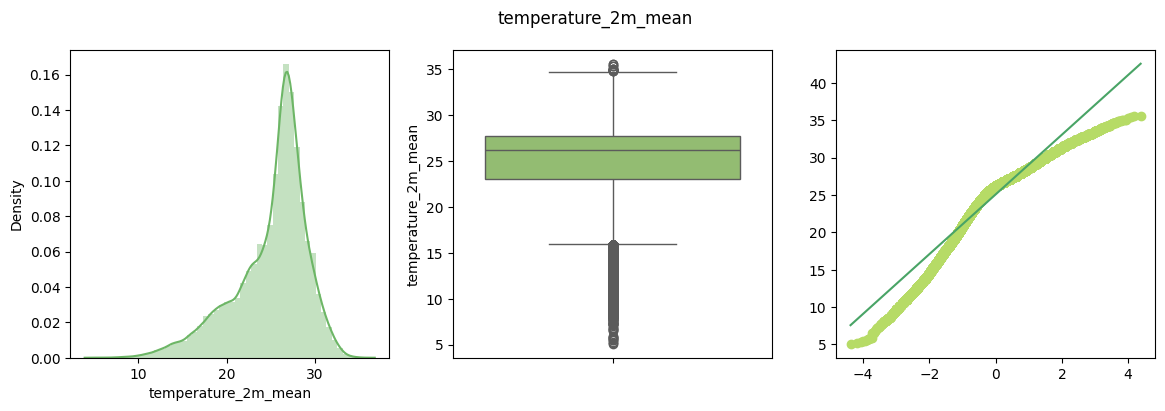

Skewness of temperature_2m_max: -0.8320472829238141
Kurtosis of temperature_2m_max: 0.8348615085489608


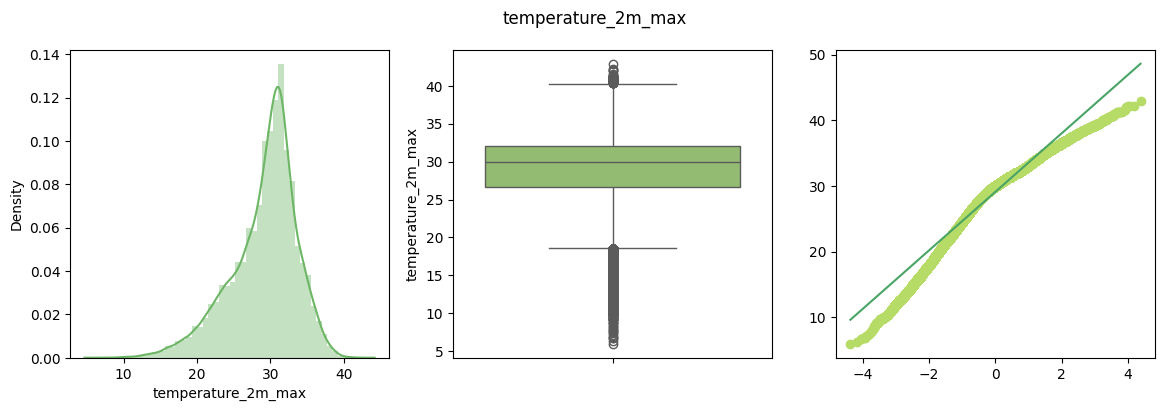

Skewness of temperature_2m_min: -1.1574745211909694
Kurtosis of temperature_2m_min: 1.0852096865182888


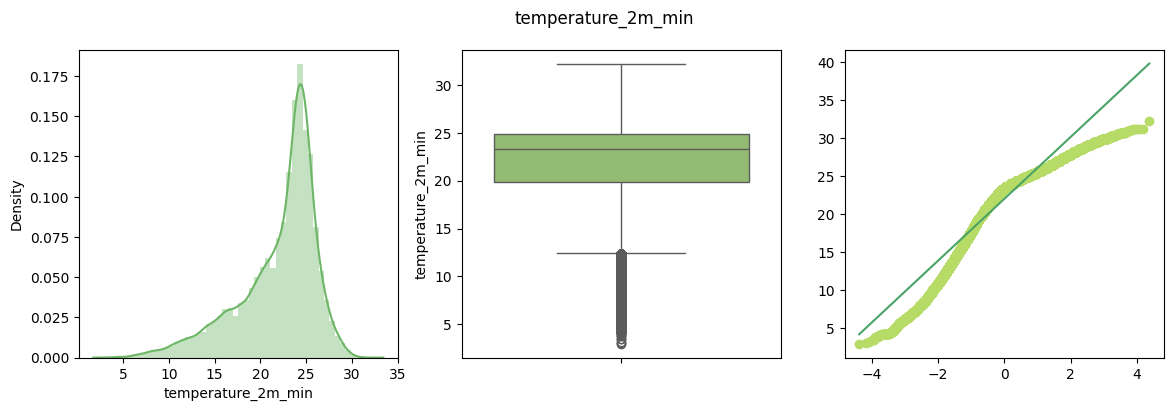

Skewness of apparent_temperature_mean: -1.049555388158072
Kurtosis of apparent_temperature_mean: 0.6908007376300382


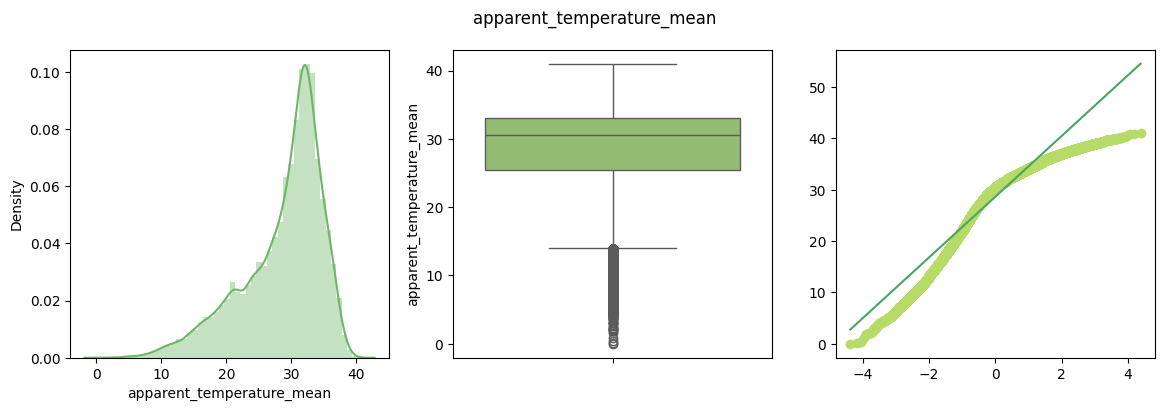

Skewness of apparent_temperature_max: -0.9078933695879035
Kurtosis of apparent_temperature_max: 0.5240609056940935


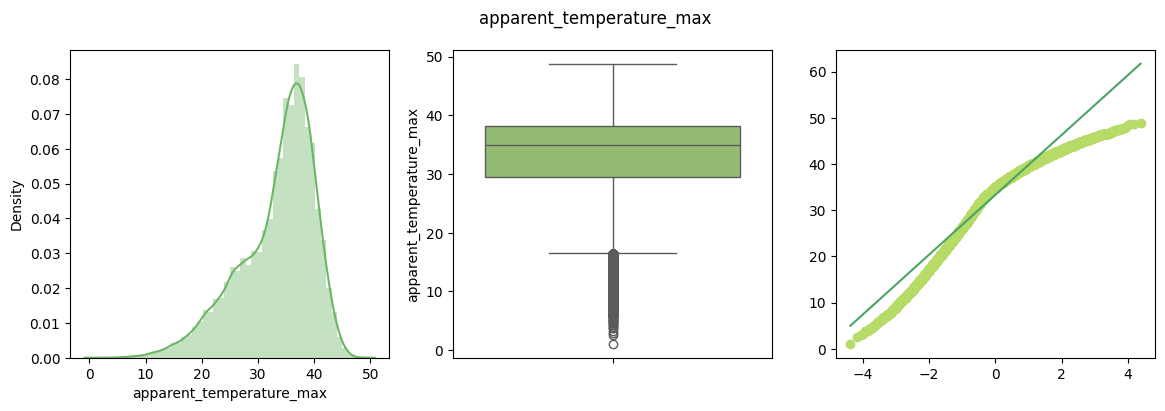

Skewness of apparent_temperature_min: -1.0865234591383832
Kurtosis of apparent_temperature_min: 0.6309311554954244


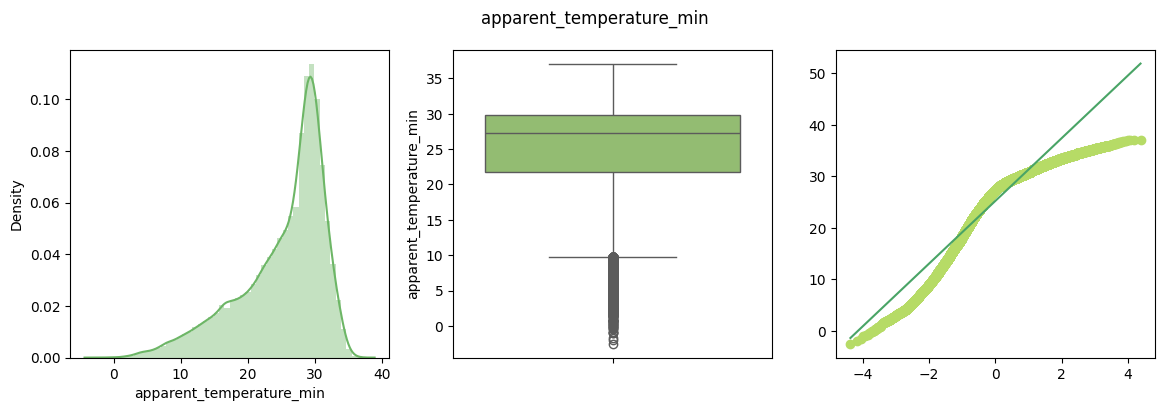

Skewness of dew_point_2m_mean: -1.5319051025549486
Kurtosis of dew_point_2m_mean: 2.44232873805059


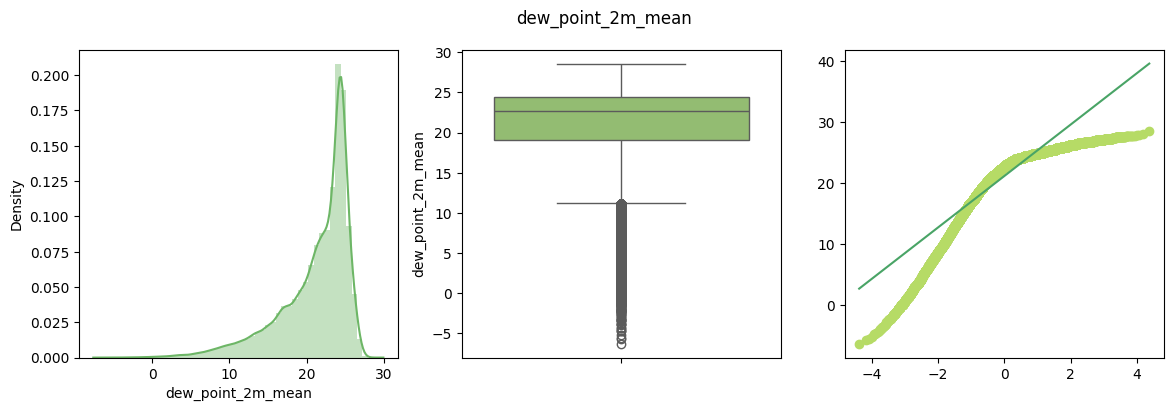

Skewness of precipitation_sum: 7.316745997693385
Kurtosis of precipitation_sum: 154.48038784996058


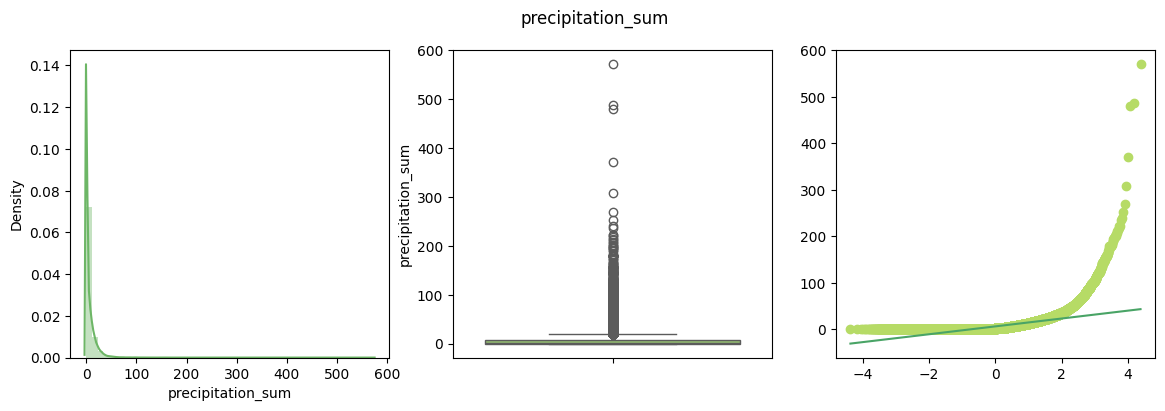

Skewness of rain_sum: 7.316745997693385
Kurtosis of rain_sum: 154.48038784996058


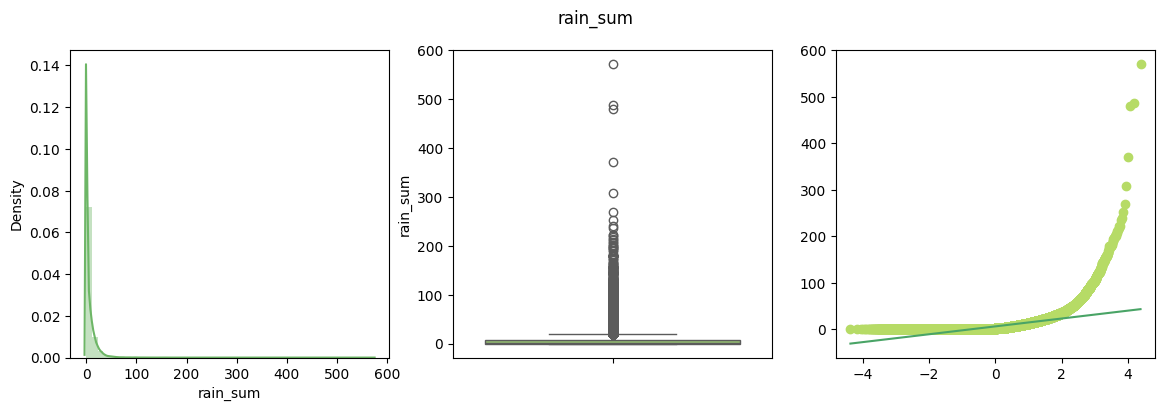

Skewness of snowfall_sum: 0.0
Kurtosis of snowfall_sum: 0.0


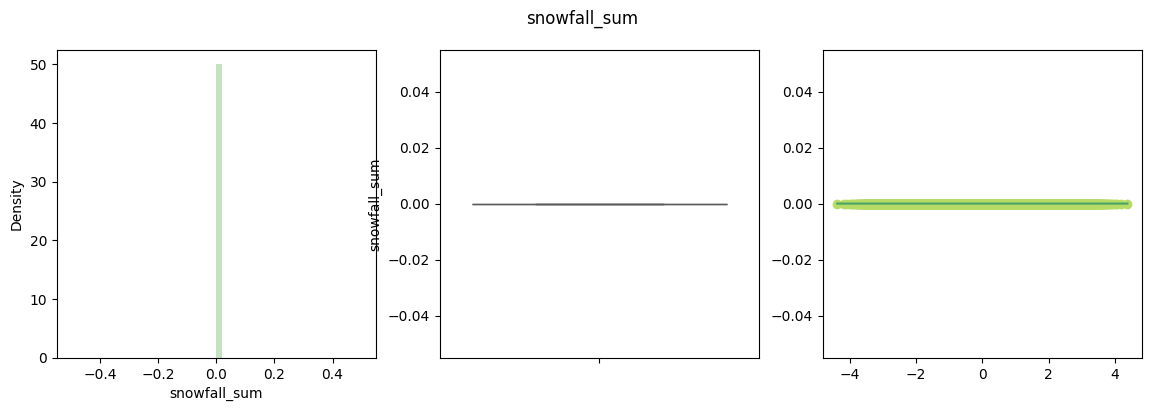

Skewness of cloud_cover_mean: -0.9018599462031818
Kurtosis of cloud_cover_mean: -0.1564445445368965


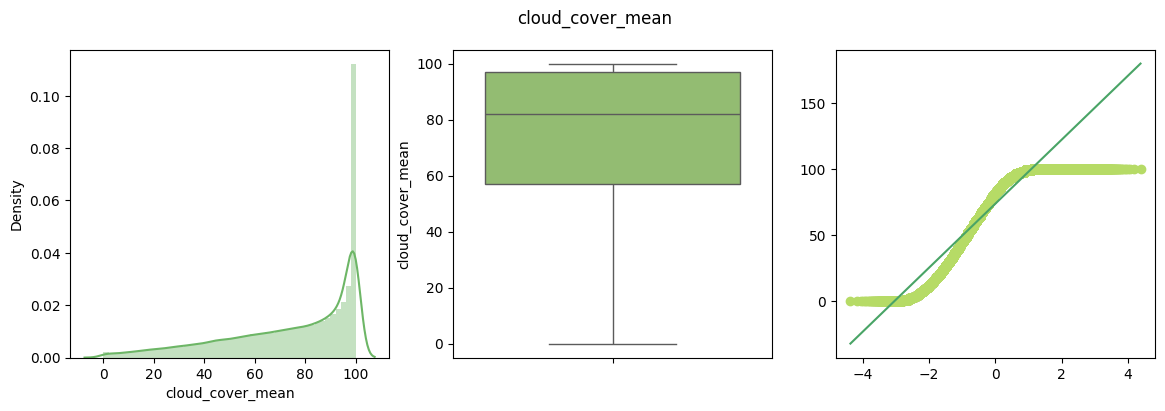

Skewness of relative_humidity_2m_mean: -0.9435080342347322
Kurtosis of relative_humidity_2m_mean: 0.7114928950607968


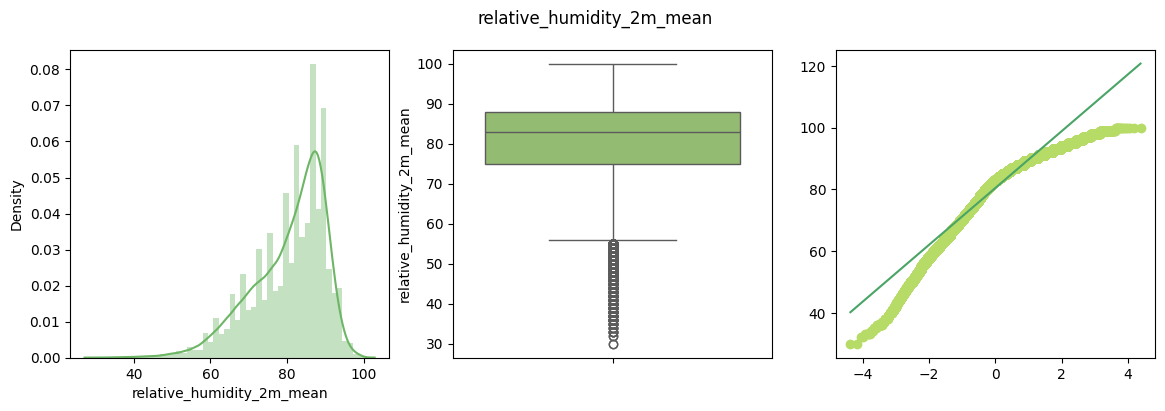

Skewness of wind_gusts_10m_mean: 1.5111618173020476
Kurtosis of wind_gusts_10m_mean: 3.8428233645005334


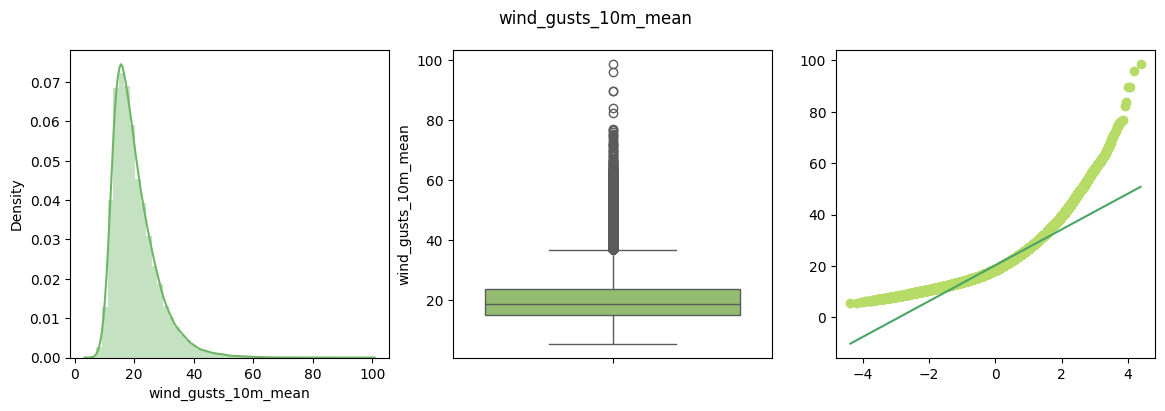

Skewness of wind_speed_10m_mean: 1.301261659022392
Kurtosis of wind_speed_10m_mean: 2.7493333449795325


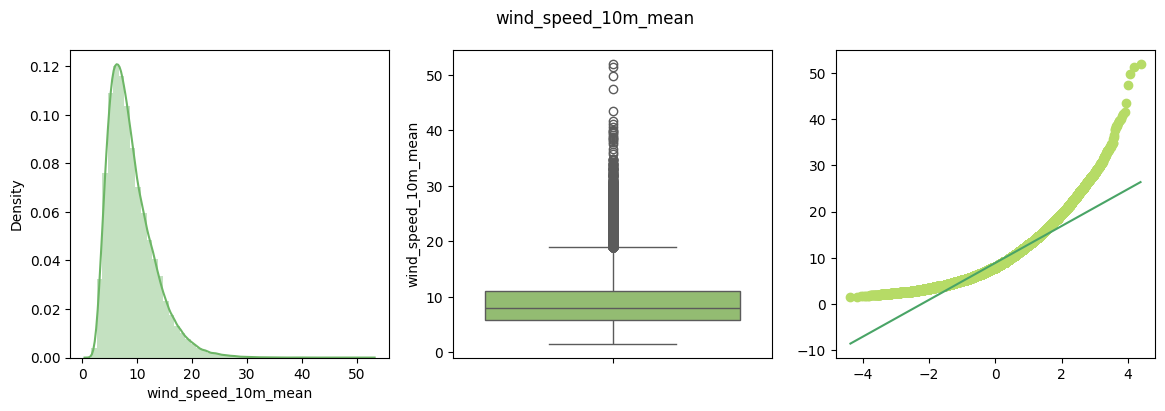

Skewness of winddirection_10m_dominant: 0.4788354880854313
Kurtosis of winddirection_10m_dominant: -0.5688331411861234


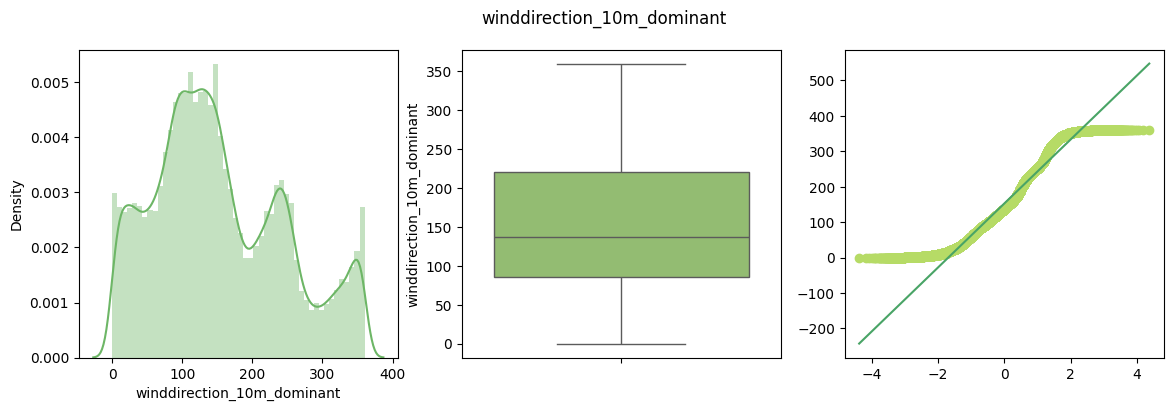

Skewness of surface_pressure_mean: -2.7052531203716415
Kurtosis of surface_pressure_mean: 7.486752389896839


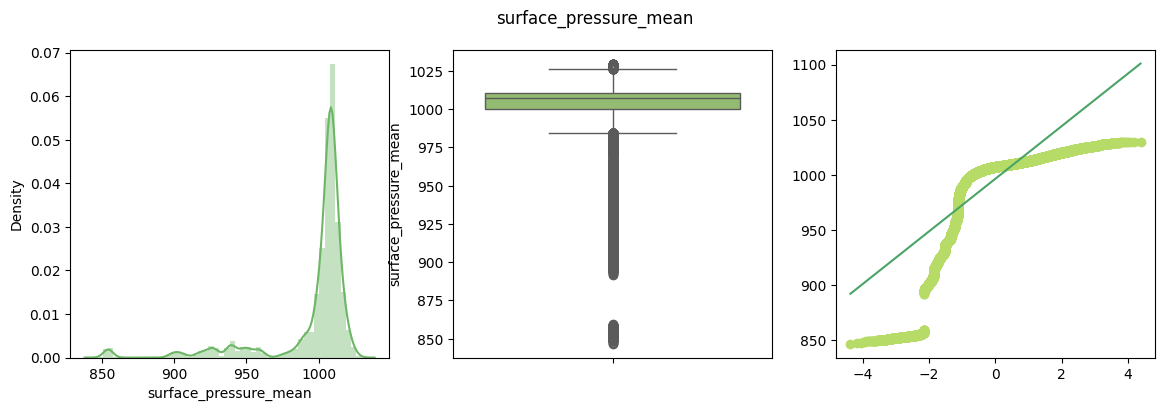

Skewness of pressure_msl_mean: 0.5330081761139847
Kurtosis of pressure_msl_mean: 0.5673607965118146


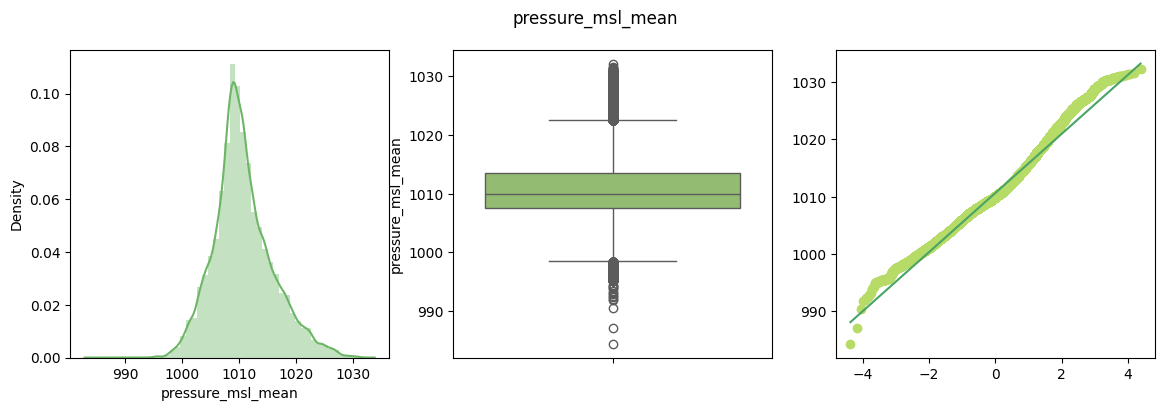

Skewness of daylight_duration: -0.0034970341895159875
Kurtosis of daylight_duration: -0.9274973431013485


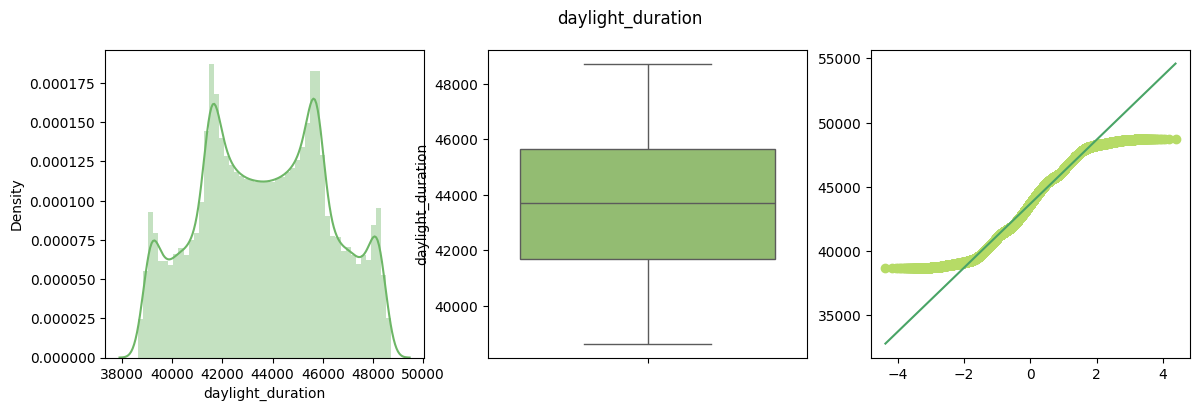

Skewness of sunshine_duration: -1.0912639247309623
Kurtosis of sunshine_duration: -0.025197215322271038


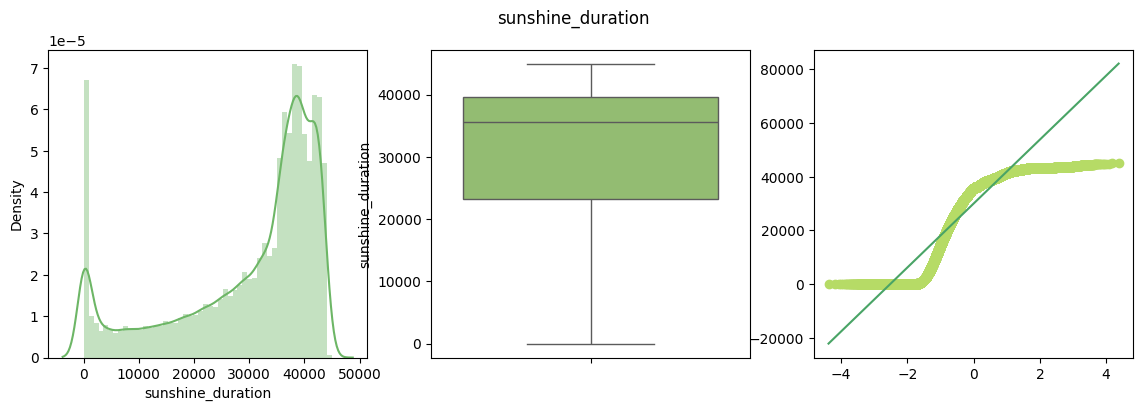

Skewness of weather_code: -0.9893743102596579
Kurtosis of weather_code: -0.8321089438458875


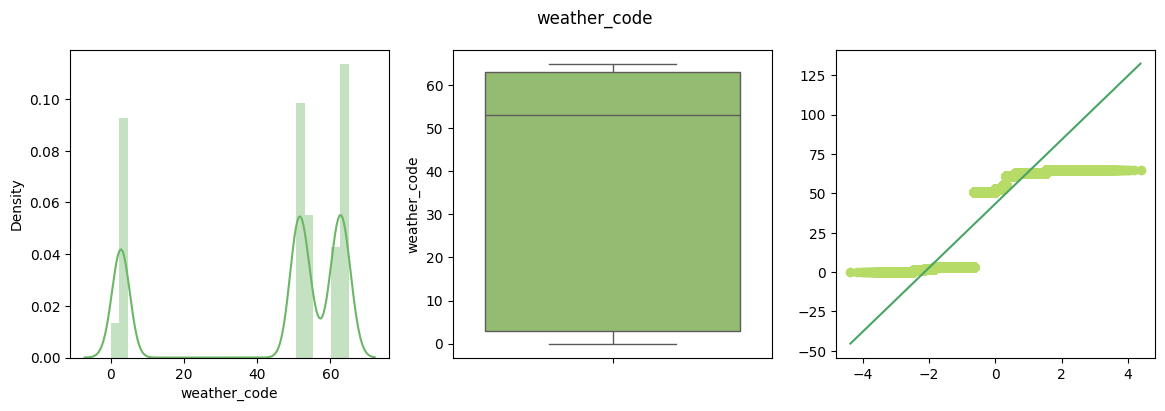

Skewness of province_id: 0.0
Kurtosis of province_id: -1.2006048648035947


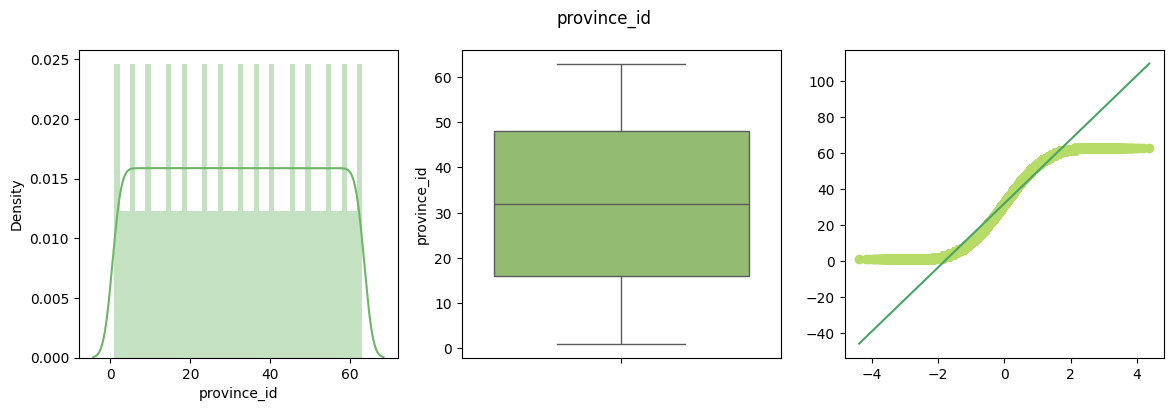

In [ ]:
for col in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(14,4))
    print(f"Skewness of {col}:", df[col].skew())
    print(f"Kurtosis of {col}:", df[col].kurtosis())

    # Biểu đồ phân phối với bảng màu 'summer'
    plt.subplot(131)
    sns.distplot(df[col], color=sns.color_palette("summer")[2])

    # Biểu đồ boxplot với bảng màu 'summer'
    plt.subplot(132)
    sns.boxplot(df[col], color=sns.color_palette("summer")[3])

    # Biểu đồ Q-Q plot với bảng màu 'summer'
    plt.subplot(133)
    osm, osr = probplot(df[col], dist='norm')[0]  # Tính toán các giá trị osm và osr
    slope, intercept, r = probplot(df[col], dist='norm')[1]
    plt.scatter(osm, osr, color=sns.color_palette("summer")[4])  # Màu cho các điểm
    plt.plot(osm, slope*osm + intercept, color=sns.color_palette("summer")[1])  # Màu cho đường

    plt.suptitle(col)
    plt.show()

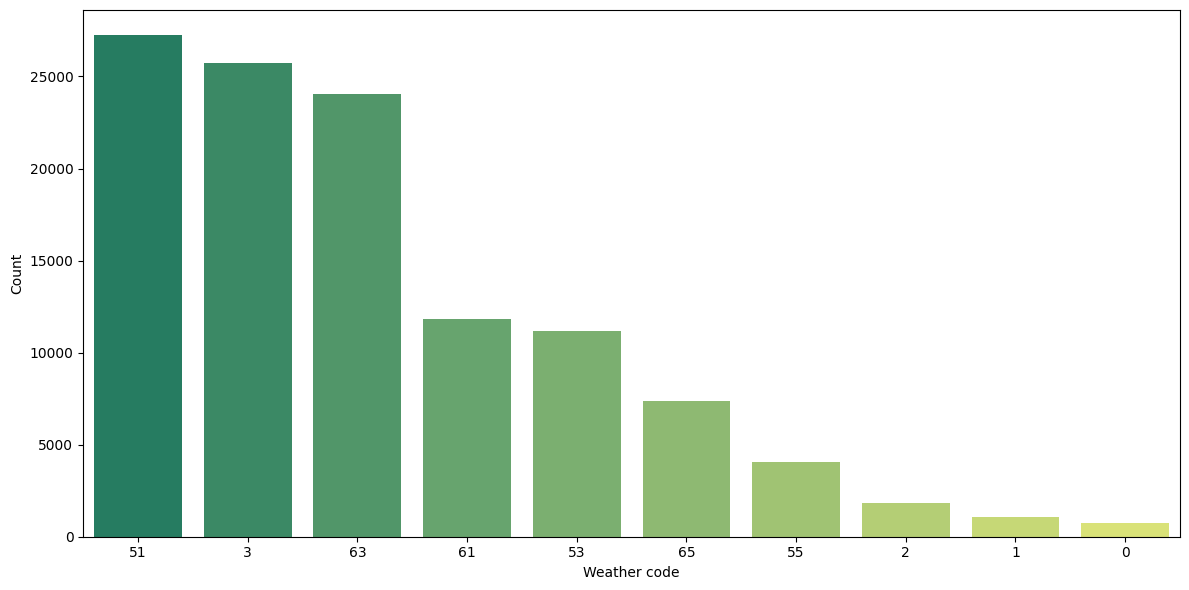

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df,
    x='weather_code',
    palette='summer',
    order=df['weather_code'].value_counts().index
)

ax.set_xlabel('Weather code')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
df.weather_code.nunique()

10

In [ ]:
df.weather_code.value_counts()

,count
weather_code,
51,27247
3,25715
63,24067
61,11807
53,11169
65,7352
55,4080
2,1835
1,1066


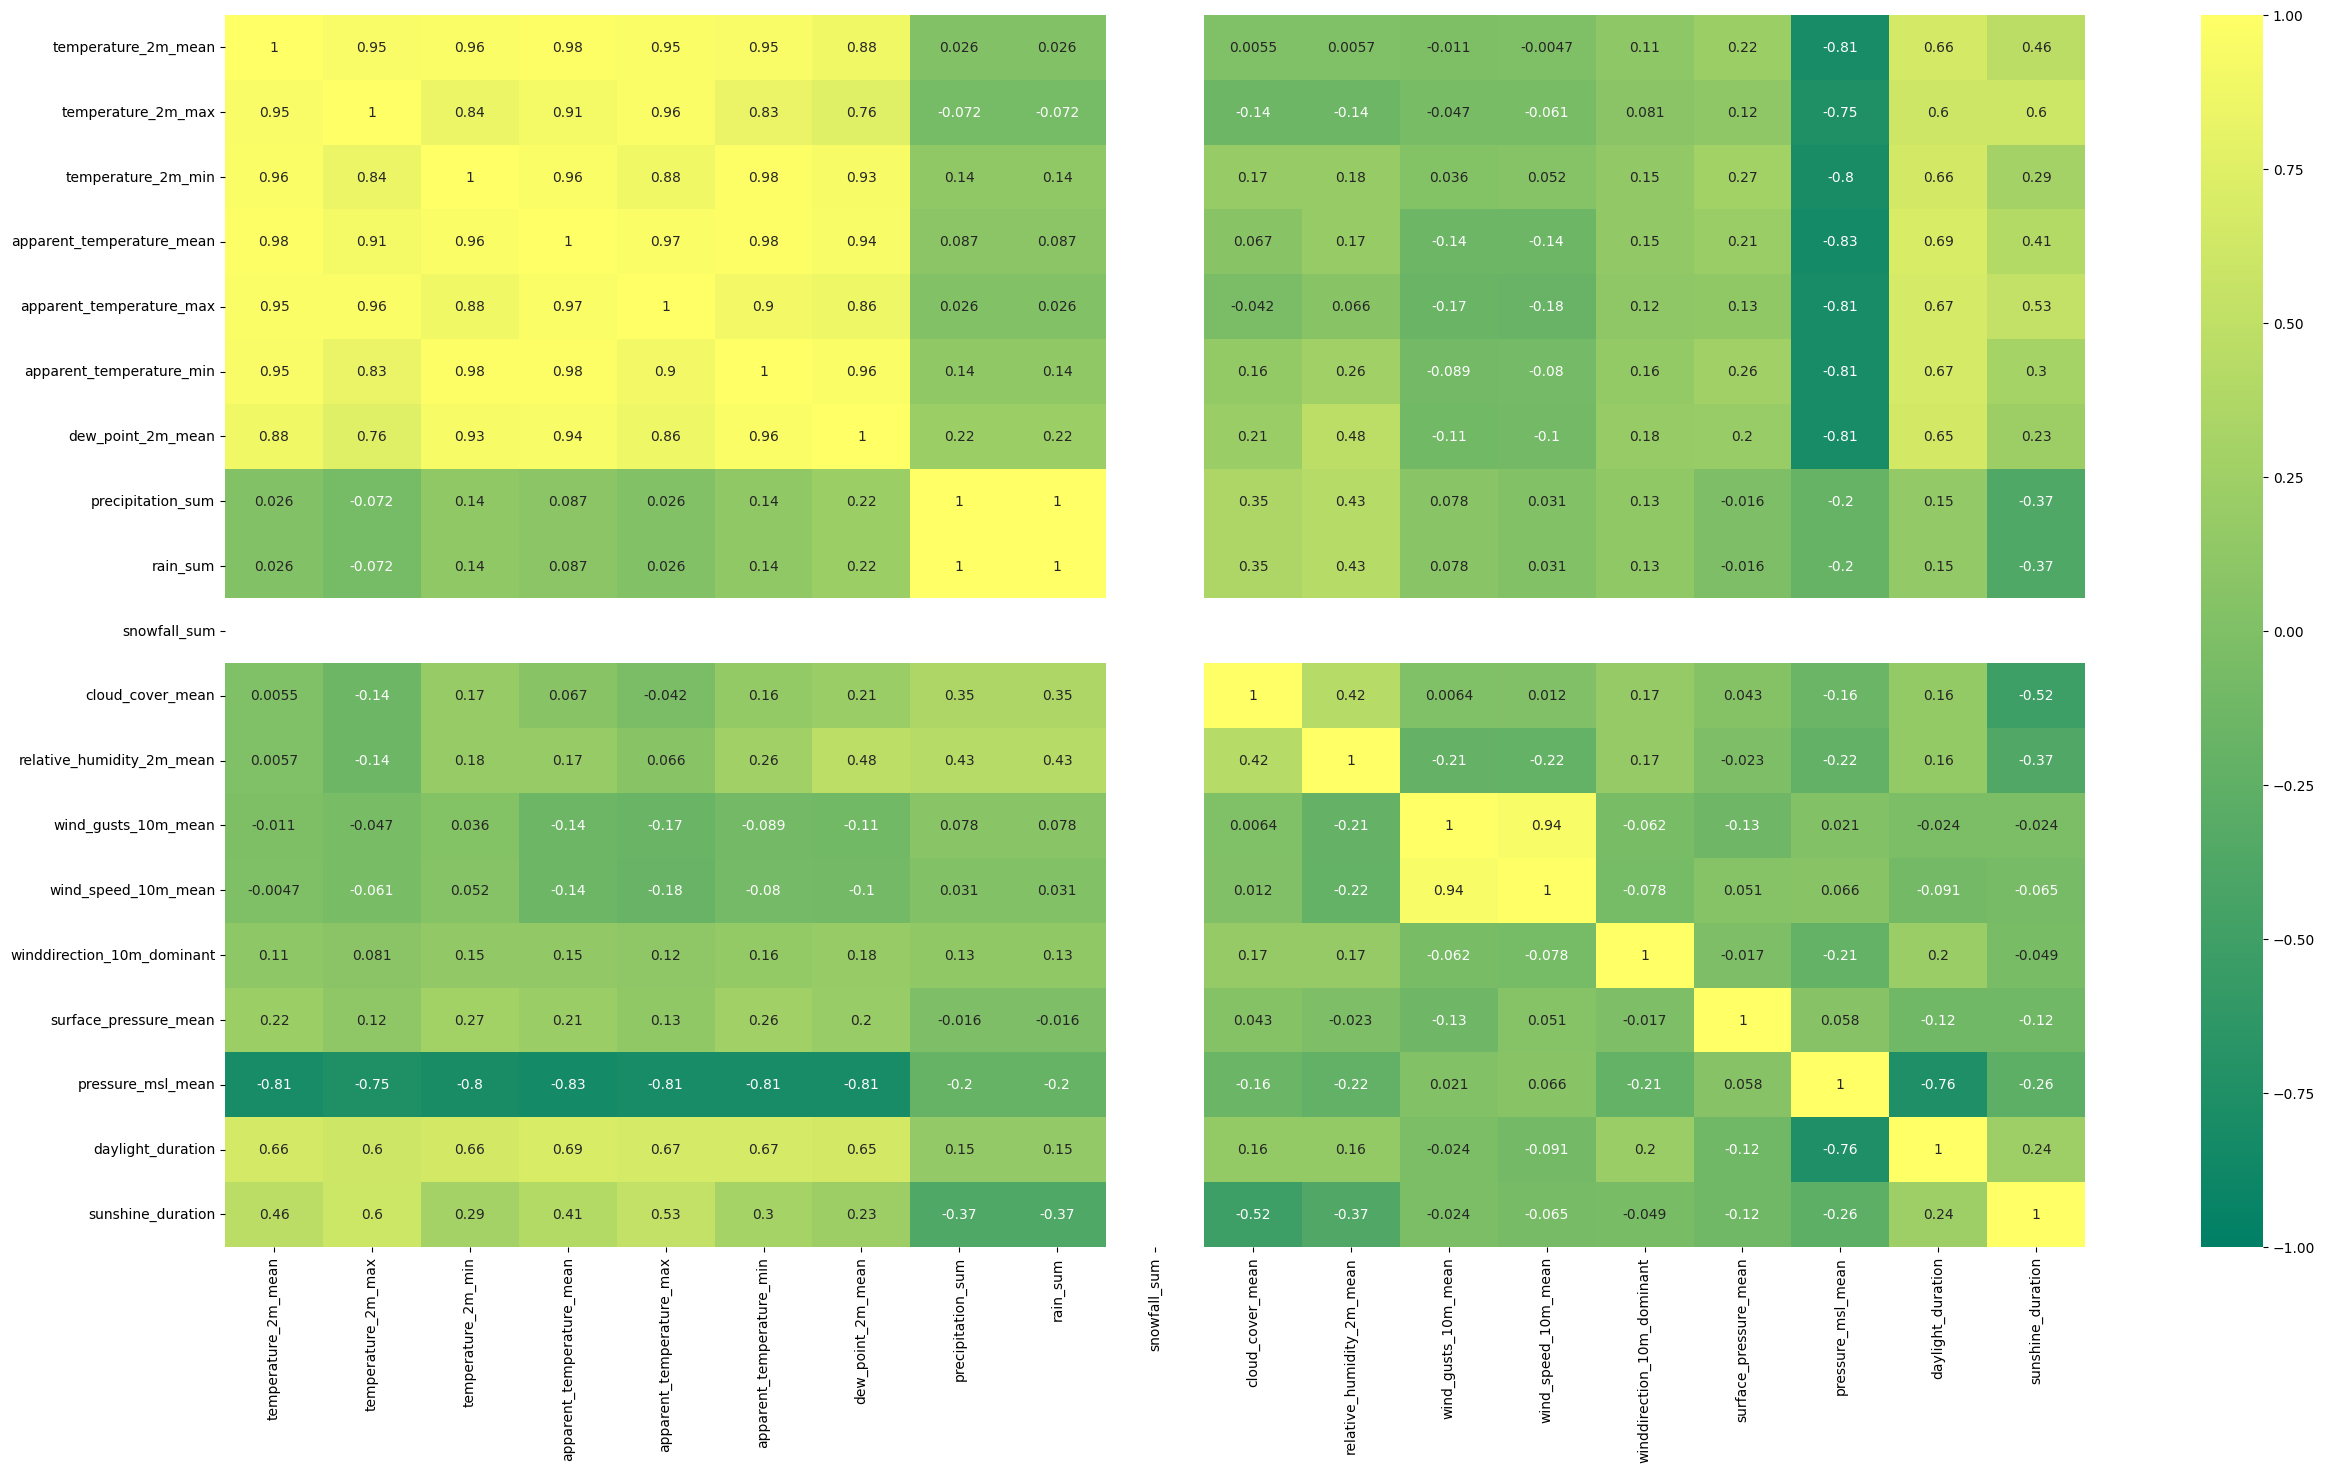

146345

In [ ]:
selected_columns = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'dew_point_2m_mean',
                    'precipitation_sum', 'rain_sum', 'snowfall_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant',
                    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration']

plt.figure(figsize=(30,16))
fig = sns.heatmap(df[selected_columns].corr(),annot=True,cmap='summer',vmin=-1.0,vmax=1.0)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [ ]:
group1 = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min']
group2 = ['dew_point_2m_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean']
group3 = ['wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant', 'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration']

In [ ]:
codes = [0, 1, 2, 3, 51, 53, 55, 61, 63, 65]
df['weather_code'] = df['weather_code'].astype('category')
df['weather_code'] = df['weather_code'].cat.set_categories(codes)

In [ ]:
for i, group in enumerate([group1, group2, group3], start=1):
    sns.pairplot(
        df[group + ['weather_code']],
        hue='weather_code',
        hue_order=codes,
        palette='summer',
        diag_kind='hist'
    )
    plt.suptitle(f"Pairplot for Group {i}", y=1.02)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Feature Engineering

### Feature Extraction

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df['date'].dtype)          # datetime64[ns]
print(df['date'].isna().sum())   # 0

datetime64[ns]
0


In [ ]:
df['dayofyear'] = df['date'].dt.dayofyear
df['sin_doy'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
df['cos_doy'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

df = df.sort_values(['province_id', 'date']).reset_index(drop=True)

In [ ]:
df = df.drop(columns=['date','dayofyear'])

### Outlier Treatment

In [ ]:
# skewed_cols = ['humidity']

# def remove_outliers(data,col):
#     lower_limit, upper_limit = data[col].quantile([0.25,0.75])
#     IQR = upper_limit - lower_limit
#     lower_whisker = lower_limit - 1.5 * IQR
#     upper_whisker = upper_limit + 1.5 * IQR
#     return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [ ]:
# for col in skewed_cols:
#     df[col] = remove_outliers(df,col)

In [ ]:
# fig = sns.boxplot(df['humidity'], palette='summer')
# plt.show(fig)
# plt.close('all')
# del fig
# gc.collect();

### Feature Splitting

In [ ]:
df.columns

Index(['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'dew_point_2m_mean', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'cloud_cover_mean',
       'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
       'wind_speed_10m_mean', 'winddirection_10m_dominant',
       'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
       'sunshine_duration', 'weather_code', 'province_id', 'sin_doy',
       'cos_doy'],
      dtype='object')

In [ ]:
features = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
            'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
            'dew_point_2m_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean',
            'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant',
            'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration', 'sin_doy', 'cos_doy'
]

target_column = ['weather_code']

In [ ]:
X = df[features]
y = df[target_column]

### Balancing the target classes

In [ ]:
def oversample_to_min(X, y, label_value, min_size):
    mask = y['weather_code'] == label_value
    X_label = X[mask]
    y_label = y[mask]

    current_size = len(X_label)
    if current_size >= min_size:
        return X, y

    repeats = min_size // current_size + 1

    X_over = pd.concat([X_label] * repeats, ignore_index=True).iloc[:min_size]
    y_over = pd.concat([y_label] * repeats, ignore_index=True).iloc[:min_size]

    return (
        pd.concat([X, X_over], ignore_index=True),
        pd.concat([y, y_over], ignore_index=True)
    )

In [ ]:
X, y = oversample_to_min(X, y, 0, 3000)
X, y = oversample_to_min(X, y, 1, 3000)
X, y = oversample_to_min(X, y, 2, 3000)

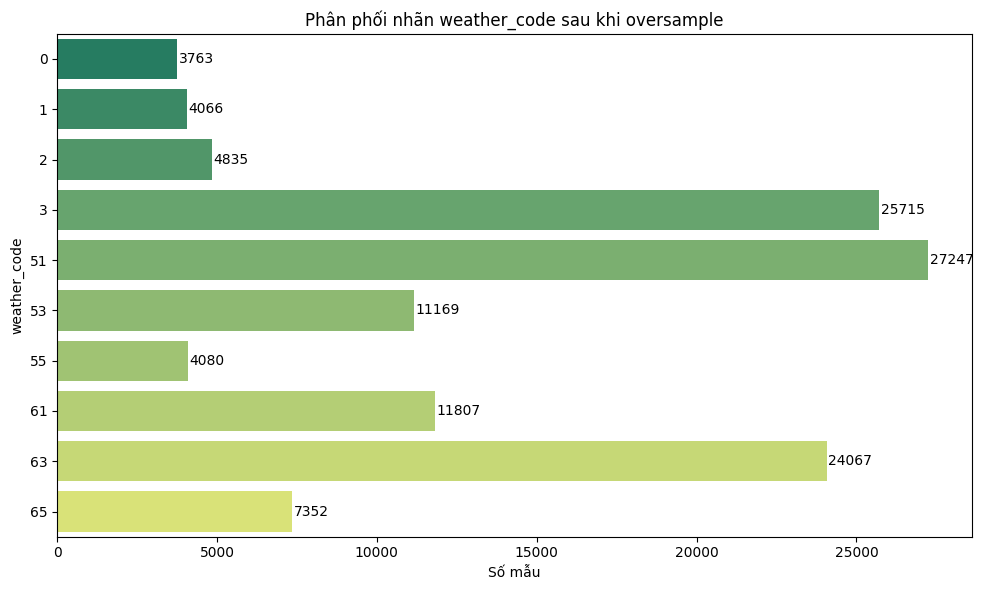

8176

In [ ]:
label_counts = y['weather_code'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=label_counts.values,
    y=label_counts.index,
    palette="summer"
)

for i, v in enumerate(label_counts.values):
    ax.text(v + 50, i, v, va='center')

plt.xlabel("Số mẫu")
plt.title("Phân phối nhãn weather_code sau khi oversample")
plt.tight_layout()
plt.show()

plt.close("all")
gc.collect()


### Label Encoding

In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y['weather_code'])

In [ ]:
encoder.classes_

array([ 0,  1,  2,  3, 51, 53, 55, 61, 63, 65])

In [ ]:
np.unique(y_encoded)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_encoded
)

In [ ]:
print("Shape of the training set:",X_train.shape)
print("Shape of the testing set:",X_test.shape)

Shape of the training set: (99280, 21)
Shape of the testing set: (24821, 21)


### Feature Selection

In [ ]:
pipeline = Pipeline([
    ('constant', DropConstantFeatures()),
    ('duplicate', DropDuplicateFeatures())
    # ('correlated', DropCorrelatedFeatures())
])

In [ ]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
print("Shape of the training set:",X_train.shape)
print("Shape of the testing set:",X_test.shape)

Shape of the training set: (99280, 19)
Shape of the testing set: (24821, 19)


In [ ]:
print("Tên cột còn lại trong X_train:", X_train.columns.tolist())
print("Tên cột còn lại trong X_test:", X_test.columns.tolist())

Tên cột còn lại trong X_train: ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant', 'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration', 'sin_doy', 'cos_doy']
Tên cột còn lại trong X_test: ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant', 'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration', 'sin_doy', 'cos_doy']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

scores = selector.scores_

score_df = pd.DataFrame({
    'feature': X_train.columns,
    'score': scores
}).sort_values('score', ascending=False)

top_10_features = score_df.head(10)['feature'].tolist()

print("Top 10 đặc trưng được chọn:", top_10_features)

Top 10 đặc trưng được chọn: ['cloud_cover_mean', 'precipitation_sum', 'relative_humidity_2m_mean', 'dew_point_2m_mean', 'apparent_temperature_min', 'cos_doy', 'temperature_2m_min', 'daylight_duration', 'pressure_msl_mean', 'apparent_temperature_mean']


In [ ]:
sfm = SelectFromModel(estimator=RandomForestClassifier(),max_features=10)
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10)

In [ ]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['precipitation_sum', 'cloud_cover_mean'], dtype=object)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
def plot_feature_importances(feat_imp_type, figsize=(10, 8)):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())

    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"])\
        .sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'}, axis=1, inplace=True)

    plt.figure(figsize=figsize)
    fig = sns.barplot(
        x='Importance',
        y='Feature',
        data=feat_imps_df,
        orient='h',
        palette='summer'
    )
    plt.title(f"{feat_imp_type.title()} Feature Importance", fontsize=16)
    plt.tight_layout()
    plt.show()
    plt.close('all')
    del fig
    gc.collect()


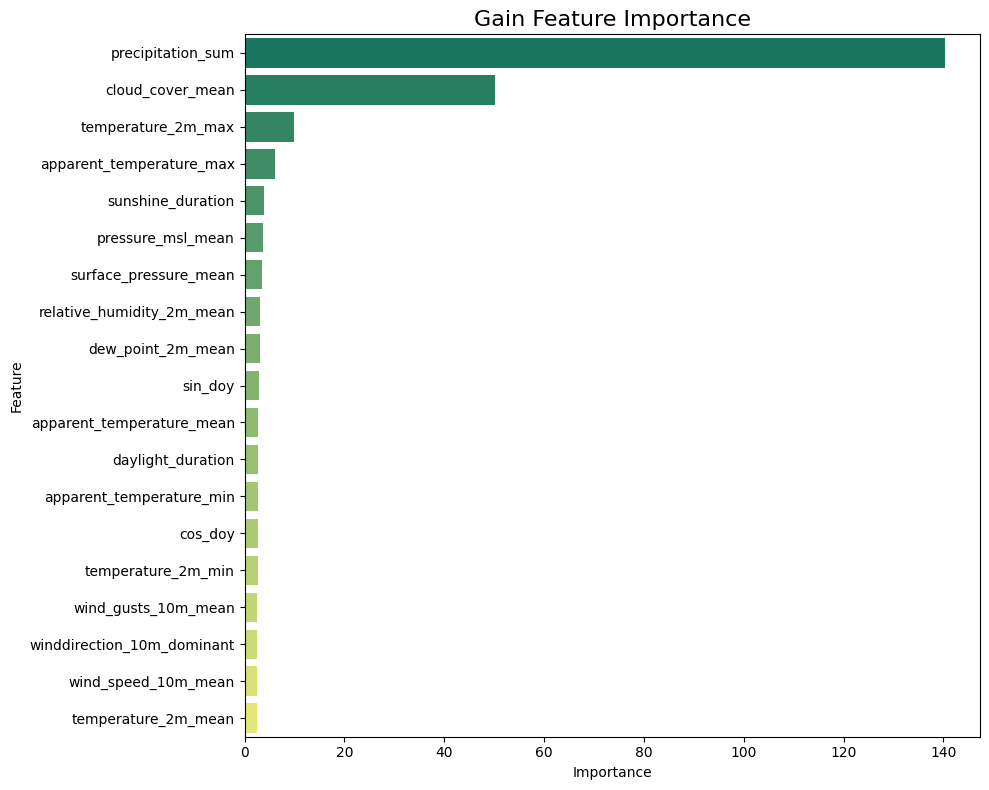

In [ ]:
plot_feature_importances('gain', figsize=(10, 8))

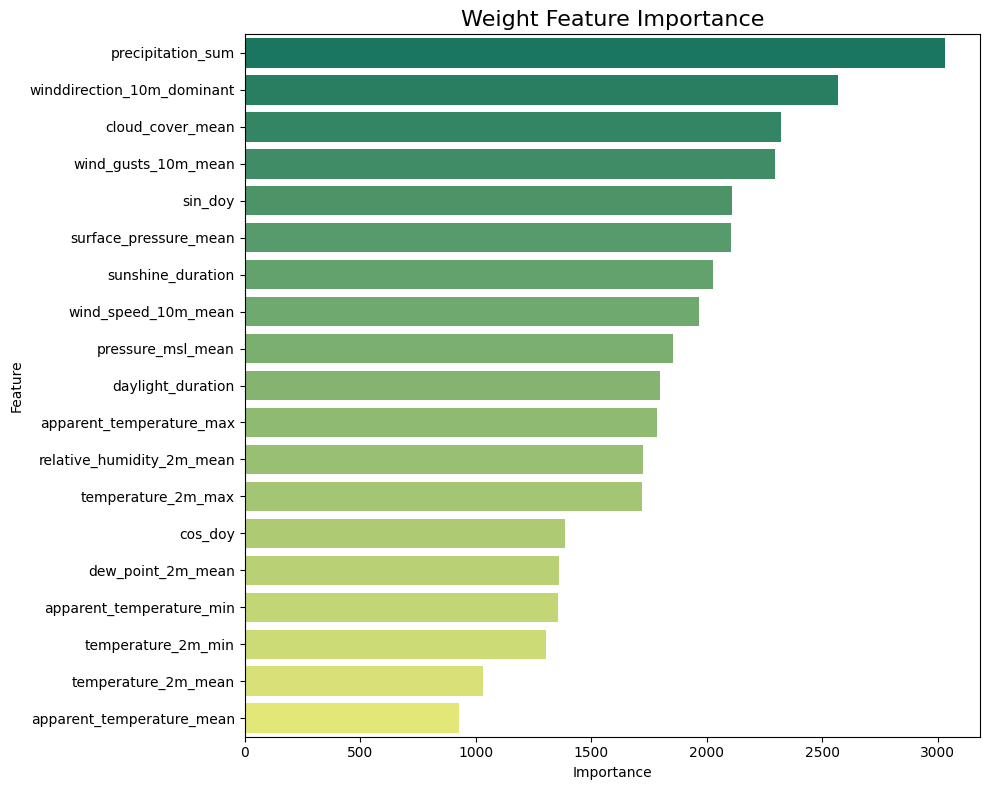

In [ ]:
plot_feature_importances('weight', figsize=(10, 8))

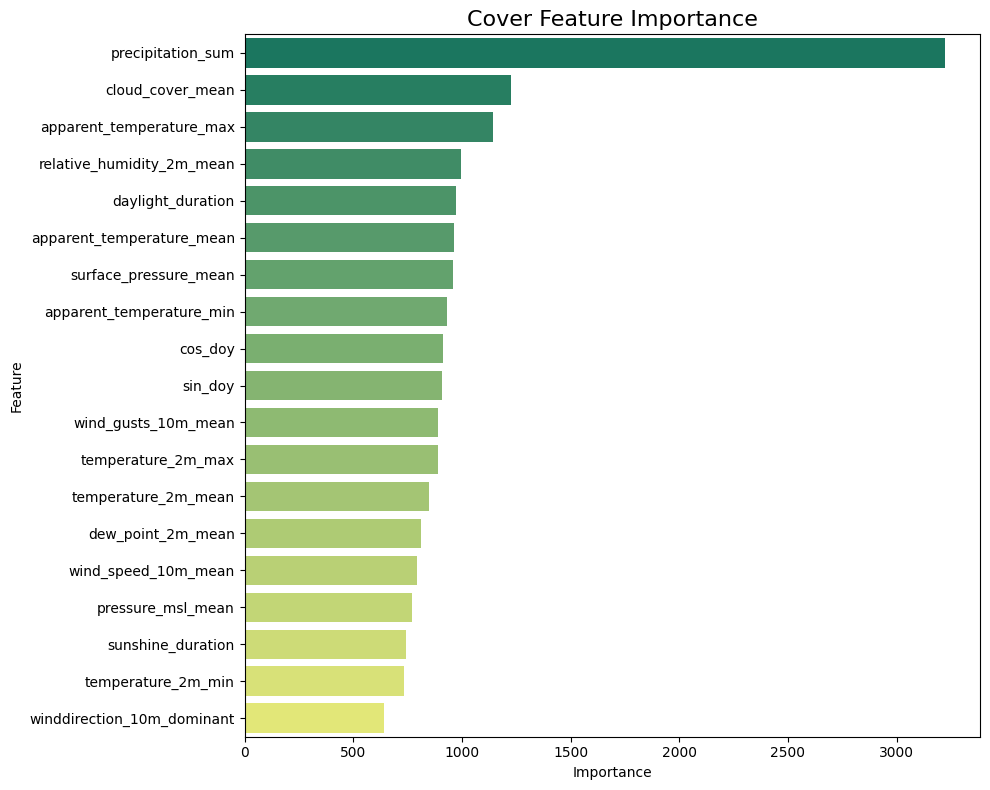

In [ ]:
plot_feature_importances('cover', figsize=(10, 8))

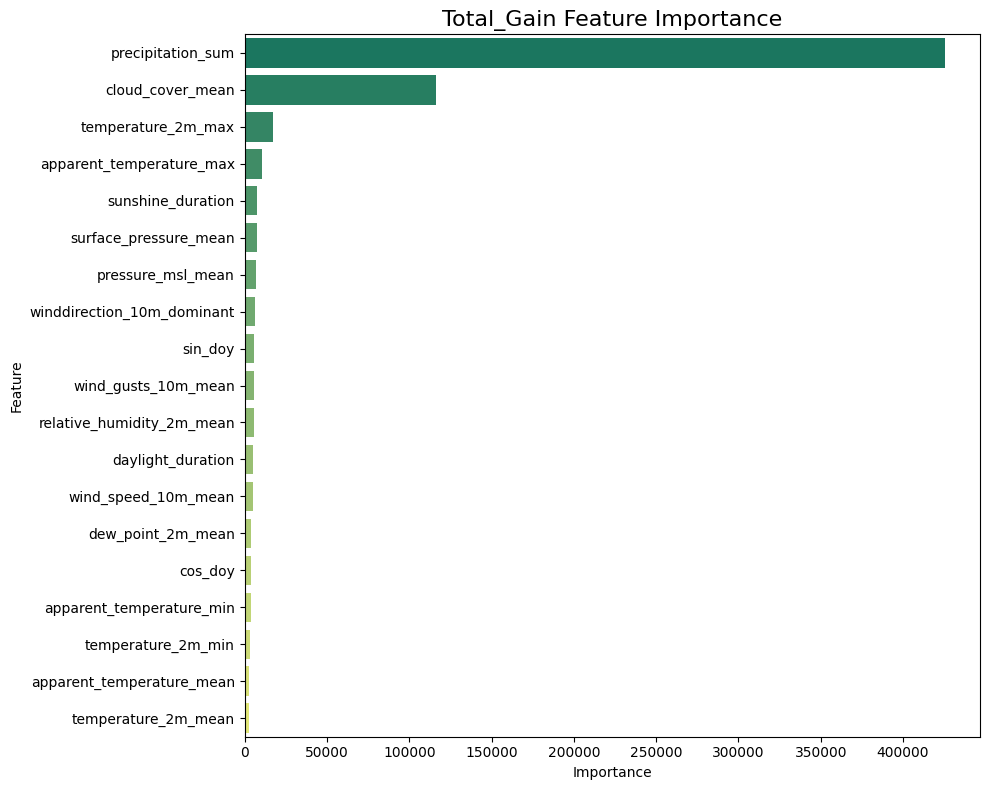

In [ ]:
plot_feature_importances('total_gain', figsize=(10, 8))

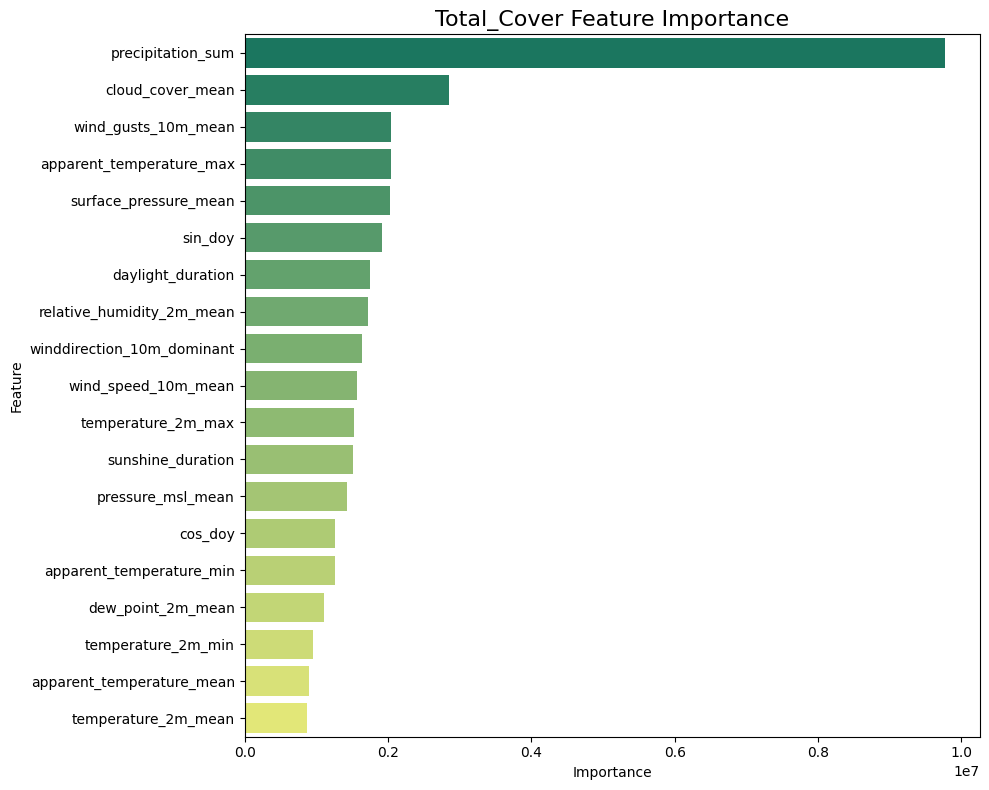

In [ ]:
plot_feature_importances('total_cover', figsize=(10, 8))

In [ ]:
final_selected_features = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
                           'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean',
                           'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant',
                           'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration', 'sin_doy', 'cos_doy']

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [ ]:
gc.collect()

6377

### Feature Scaling

In [ ]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)

final_X_train.head()

,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,dew_point_2m_mean,precipitation_sum,cloud_cover_mean,relative_humidity_2m_mean,wind_gusts_10m_mean,wind_speed_10m_mean,winddirection_10m_dominant,surface_pressure_mean,pressure_msl_mean,daylight_duration,sunshine_duration,sin_doy,cos_doy
0,-0.858083,-1.097418,-0.540065,-0.940577,-1.300130,-0.581397,-0.850303,-0.482174,-0.035050,-0.357933,-0.059717,0.128287,-0.205530,0.675406,1.330609,-0.933270,-0.574395,0.714266,1.170715
1,0.813463,0.935347,0.818830,0.523210,0.651345,0.509586,0.535980,-0.420139,-0.300867,-0.357933,2.129788,2.351840,1.226696,0.312807,-0.796224,0.382740,0.689146,-1.188173,-0.839666
2,-2.854651,-3.195058,-2.249644,-2.778096,-3.046186,-2.291587,-2.460837,-0.163141,1.028221,-0.257924,0.337131,0.732514,2.188803,0.733165,1.647769,-1.193421,-2.400023,0.734829,1.157737
3,-1.368833,-1.875923,-1.066090,-1.158587,-1.520221,-0.949972,-0.666824,0.209064,1.028221,1.242201,-1.113417,-0.814306,2.068540,0.524590,1.405235,-0.766040,-2.400023,-1.356239,0.422469
4,-2.251037,-2.221926,-1.942796,-2.264213,-2.341894,-2.011469,-1.849241,-0.446725,0.197541,0.042101,0.651872,0.998373,-1.276967,-0.306499,1.237327,-1.800615,-0.935493,-0.521954,1.289032


## Model Training & Evaluation

In [ ]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
hamming_losses = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(final_X_train, y_train)
    y_pred = model.predict(final_X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

    acc = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracy_scores.append(acc)
    hamming_losses.append(hamming)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    models.append(model)
    gc.collect()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       753
           1       0.57      0.61      0.59       813
           2       0.50      0.41      0.45       967
           3       0.81      0.94      0.87      5143
           4       0.79      0.78      0.79      5450
           5       0.49      0.48      0.48      2234
           6       0.00      0.00      0.00       816
           7       0.50      0.49      0.50      2361
           8       0.71      0.82      0.76      4814
           9       0.73      0.44      0.55      1470

    accuracy                           0.70     24821
   macro avg       0.59      0.59      0.58     24821
weighted avg       0.68      0.70      0.69     24821

--------------------------------------------------


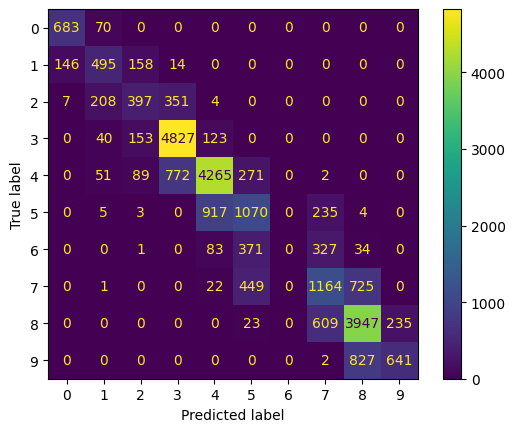

In [ ]:
lr = LogisticRegression(max_iter=1000)
train_and_evaluate_model(lr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.94      1.00      0.96       813
           2       0.81      0.95      0.88       967
           3       0.99      0.95      0.97      5143
           4       0.87      0.86      0.86      5450
           5       0.44      0.44      0.44      2234
           6       0.18      0.19      0.19       816
           7       0.42      0.43      0.43      2361
           8       0.68      0.66      0.67      4814
           9       0.52      0.56      0.54      1470

    accuracy                           0.73     24821
   macro avg       0.69      0.70      0.69     24821
weighted avg       0.74      0.73      0.74     24821

--------------------------------------------------


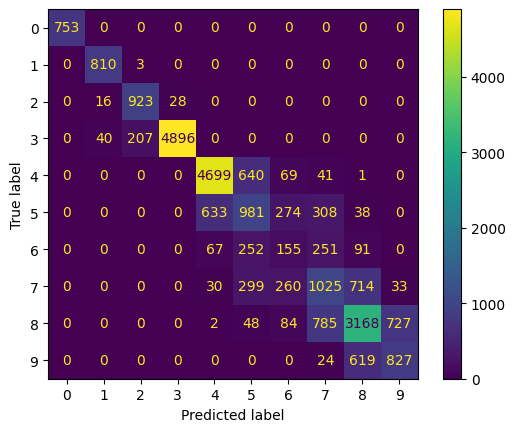

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dtc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.95      0.99      0.97       813
           2       0.88      0.96      0.92       967
           3       1.00      0.97      0.98      5143
           4       0.88      0.93      0.90      5450
           5       0.54      0.57      0.55      2234
           6       0.26      0.03      0.06       816
           7       0.52      0.48      0.50      2361
           8       0.71      0.86      0.78      4814
           9       0.75      0.48      0.59      1470

    accuracy                           0.80     24821
   macro avg       0.75      0.73      0.72     24821
weighted avg       0.78      0.80      0.78     24821

--------------------------------------------------


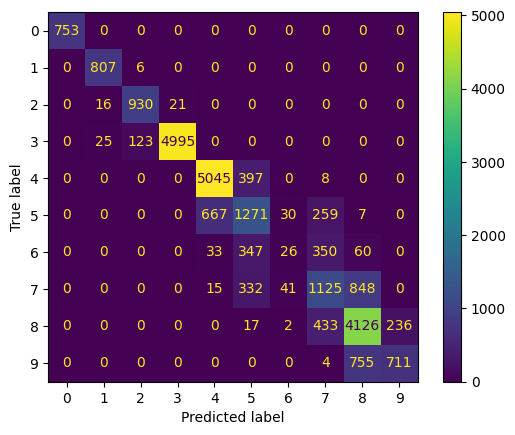

In [ ]:
rfc = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rfc)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       753
           1       0.66      0.72      0.69       813
           2       0.60      0.53      0.56       967
           3       0.95      0.95      0.95      5143
           4       0.89      0.90      0.90      5450
           5       0.52      0.58      0.55      2234
           6       0.29      0.00      0.00       816
           7       0.48      0.50      0.49      2361
           8       0.71      0.84      0.77      4814
           9       0.71      0.51      0.60      1470

    accuracy                           0.76     24821
   macro avg       0.67      0.64      0.64     24821
weighted avg       0.75      0.76      0.75     24821

--------------------------------------------------


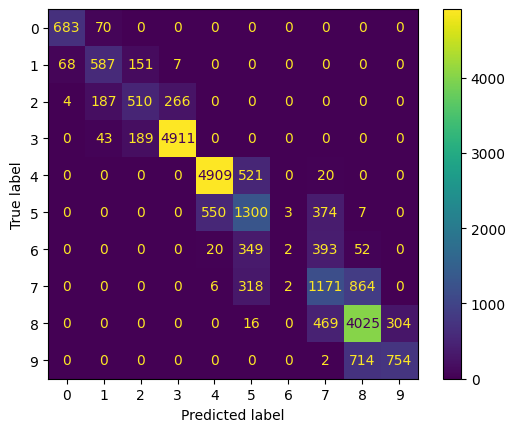

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gbc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.94      0.99      0.97       813
           2       0.84      0.96      0.89       967
           3       0.99      0.96      0.98      5143
           4       0.87      0.91      0.89      5450
           5       0.51      0.54      0.53      2234
           6       0.25      0.12      0.16       816
           7       0.49      0.49      0.49      2361
           8       0.72      0.79      0.75      4814
           9       0.69      0.50      0.58      1470

    accuracy                           0.78     24821
   macro avg       0.73      0.73      0.72     24821
weighted avg       0.77      0.78      0.77     24821

--------------------------------------------------


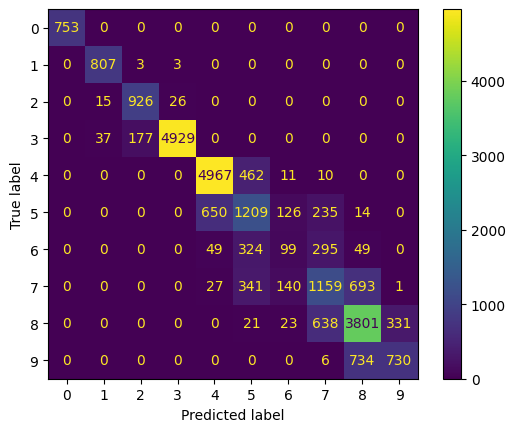

In [ ]:
bagging = BaggingClassifier(random_state=42)
train_and_evaluate_model(bagging)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       753
           1       0.91      0.97      0.94       813
           2       0.80      0.82      0.81       967
           3       0.98      0.96      0.97      5143
           4       0.89      0.91      0.90      5450
           5       0.53      0.60      0.57      2234
           6       0.32      0.04      0.07       816
           7       0.51      0.52      0.51      2361
           8       0.73      0.82      0.77      4814
           9       0.70      0.55      0.62      1470

    accuracy                           0.79     24821
   macro avg       0.74      0.72      0.71     24821
weighted avg       0.78      0.79      0.78     24821

--------------------------------------------------


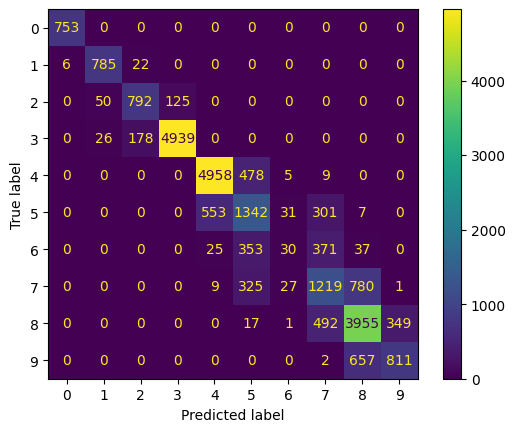

In [ ]:
hgbc = HistGradientBoostingClassifier()
train_and_evaluate_model(hgbc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.97      1.00      0.98       813
           2       0.93      0.96      0.94       967
           3       0.99      0.98      0.98      5143
           4       0.85      0.93      0.89      5450
           5       0.53      0.51      0.52      2234
           6       0.26      0.05      0.09       816
           7       0.51      0.48      0.50      2361
           8       0.72      0.84      0.77      4814
           9       0.74      0.50      0.60      1470

    accuracy                           0.79     24821
   macro avg       0.75      0.72      0.73     24821
weighted avg       0.78      0.79      0.78     24821

--------------------------------------------------


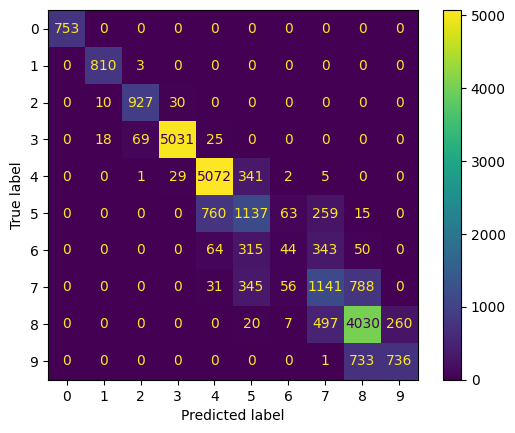

In [ ]:
etc = ExtraTreesClassifier(random_state=42)
train_and_evaluate_model(etc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.93      0.99      0.96       813
           2       0.83      0.85      0.84       967
           3       0.98      0.96      0.97      5143
           4       0.89      0.90      0.90      5450
           5       0.54      0.60      0.57      2234
           6       0.30      0.04      0.07       816
           7       0.51      0.52      0.51      2361
           8       0.73      0.83      0.78      4814
           9       0.72      0.57      0.64      1470

    accuracy                           0.79     24821
   macro avg       0.74      0.73      0.72     24821
weighted avg       0.78      0.79      0.78     24821

--------------------------------------------------


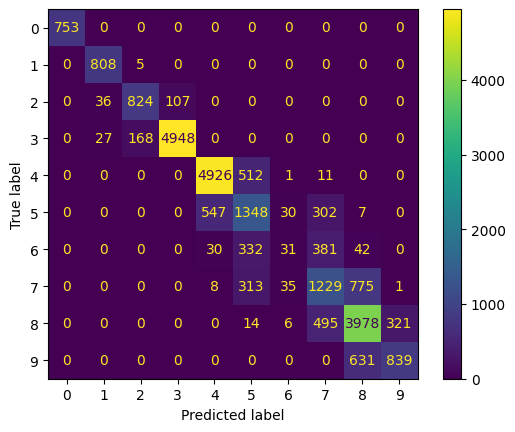

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_and_evaluate_model(xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       753
           1       0.78      0.80      0.79       813
           2       0.68      0.63      0.66       967
           3       0.96      0.96      0.96      5143
           4       0.90      0.91      0.90      5450
           5       0.55      0.63      0.59      2234
           6       0.37      0.02      0.04       816
           7       0.53      0.56      0.54      2361
           8       0.74      0.83      0.78      4814
           9       0.73      0.57      0.64      1470

    accuracy                           0.78     24821
   macro avg       0.72      0.69      0.68     24821
weighted avg       0.77      0.78      0.77     24821

--------------------------------------------------


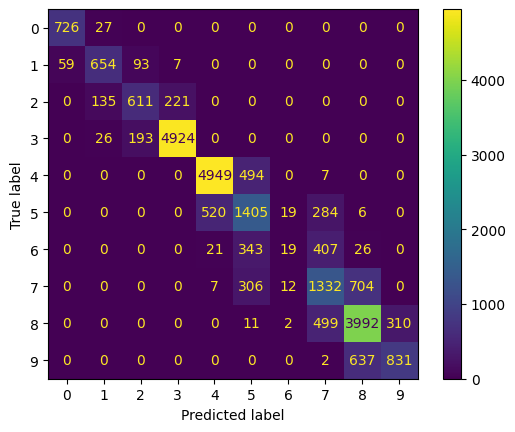

In [ ]:
cbc = CatBoostClassifier(silent=True, random_state=42)
train_and_evaluate_model(cbc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.95      0.99      0.97       813
           2       0.87      0.95      0.91       967
           3       0.99      0.97      0.98      5143
           4       0.89      0.92      0.90      5450
           5       0.55      0.61      0.57      2234
           6       0.35      0.02      0.04       816
           7       0.51      0.51      0.51      2361
           8       0.73      0.84      0.78      4814
           9       0.74      0.55      0.63      1470

    accuracy                           0.80     24821
   macro avg       0.76      0.73      0.73     24821
weighted avg       0.79      0.80      0.79     24821

--------------------------------------------------


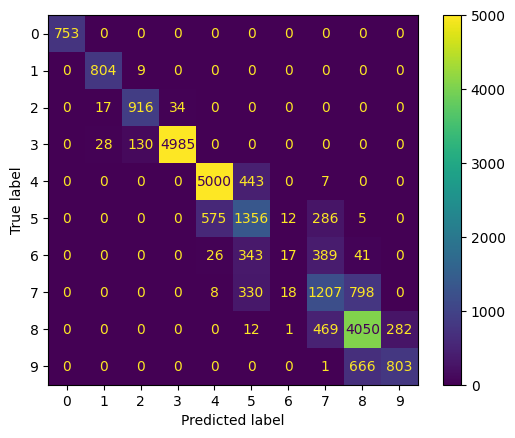

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('XGB', XGBClassifier()),
        ('LGBM', LGBMClassifier()),
        ('ET', ExtraTreesClassifier()),
        ('RF', RandomForestClassifier())
    ],
    voting='soft',
    weights=[3, 3, 2, 2],
    n_jobs=-1,
    verbose=1
)

train_and_evaluate_model(voting_clf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.98      0.99      0.98       813
           2       0.95      0.96      0.95       967
           3       0.99      0.99      0.99      5143
           4       0.90      0.91      0.91      5450
           5       0.55      0.64      0.59      2234
           6       0.33      0.00      0.00       816
           7       0.51      0.54      0.52      2361
           8       0.74      0.82      0.77      4814
           9       0.71      0.58      0.64      1470

    accuracy                           0.81     24821
   macro avg       0.77      0.74      0.74     24821
weighted avg       0.80      0.81      0.79     24821

--------------------------------------------------


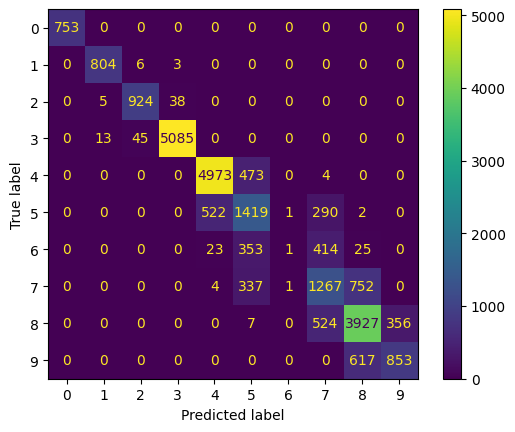

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('XGB', XGBClassifier()),
        ('LGBM', LGBMClassifier()),
        ('ET', ExtraTreesClassifier()),
        ('GBC', GradientBoostingClassifier())
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    cv=5,
    n_jobs=-1,
    verbose=1
)

train_and_evaluate_model(stacking_clf)

## Baseline Models Performance Comparison

In [ ]:
model_perfs = pd.DataFrame({'Model': models,
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False)
model_perfs

,Model,Accuracy,Precision,Recall,F1
10,"StackingClassifier(cv=5,\n e...",0.806011,0.765008,0.741473,0.735579
9,"VotingClassifier(estimators=[('XGB',\n ...",0.801378,0.758012,0.734949,0.729387
2,"(DecisionTreeClassifier(max_features=4, random...",0.797268,0.748075,0.726932,0.724459
7,"XGBClassifier(base_score=None, booster=None, c...",0.793038,0.742605,0.727093,0.723115
6,"(ExtraTreeClassifier(max_features=4, random_st...",0.792917,0.748140,0.724778,0.726858
5,HistGradientBoostingClassifier(),0.789009,0.735970,0.718170,0.714414
8,<catboost.core.CatBoostClassifier object at 0x...,0.783329,0.715187,0.687684,0.684626
4,(DecisionTreeClassifier(random_state=195292617...,0.780790,0.730484,0.725956,0.723748
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.759518,0.671926,0.644146,0.641423
1,DecisionTreeClassifier(random_state=42),0.734741,0.686181,0.704886,0.694719


## Hyperparameter Tuning and Cross Validation


In [ ]:
param_distributions = {
    'n_estimators': [200, 300, 400],
    'criterion': ['gini'],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'oob_score': [False],
    'class_weight': ['balanced'],
    'max_depth': [10, 15, 20]
}

base_model = RandomForestClassifier(random_state=42,n_jobs=1)

grid_rf = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

grid_rf.fit(final_X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=300, oob_score=False; total time=  46.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=300, oob_score=False; total time=  50.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=300, oob_score=False; total time=  50.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, oob_score=False; total time=  17.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, oob_score=False; total time=  17.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, oob_score=False; total time=  18.2s
[CV] END bootstrap=True, class_wei

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced'],
                                        'criterion': ['gini'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [200, 300, 400],
                                        'oob_score': [False]},
                   random_state=42, verbose=2)

In [ ]:
grid_rf.best_score_

np.float64(0.7188759057597688)

In [ ]:
grid_rf.best_params_

{'oob_score': False,
 'n_estimators': 400,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': 'balanced',
 'bootstrap': True}

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.05, 0.1, 0.2],
    'criterion': ['friedman_mse'],
    'max_features': ['sqrt', 'log2']
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    verbose=3
)

grid_gb.fit(final_X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=100;, score=0.766 total time= 2.2min
[CV 2/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=100;, score=0.765 total time= 2.2min
[CV 3/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=100;, score=0.768 total time= 2.2min
[CV 1/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=400;, score=0.784 total time= 8.7min
[CV 2/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=400;, score=0.783 total time= 8.6min
[CV 3/3] END criterion=friedman_mse, learning_rate=0.2, max_features=log2, n_estimators=400;, score=0.780 total time= 8.6min
[CV 1/3] END criterion=friedman_mse, learning_rate=0.2, max_features=sqrt, n_estimators=200;, score=0.775 total time= 4.3min
[CV 2/3] END criterion=friedman_mse, learning_rate=0.2, max_featu

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 400]},
                   verbose=3)

In [ ]:
grid_gb.best_score_

np.float64(0.781950023810186)

In [ ]:
grid_gb.best_params_

{'n_estimators': 400,
 'max_features': 'log2',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [None, 6, 10],
    'max_iter': [200, 400, 600],
    'l2_regularization': [0.0, 0.1, 1.0],
    'loss': ['log_loss']
}

base_model = HistGradientBoostingClassifier(random_state=42)

grid_hgb = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

grid_hgb.fit(final_X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END l2_regularization=0.1, learning_rate=0.05, loss=log_loss, max_depth=6, max_iter=200; total time=  30.1s
[CV] END l2_regularization=0.1, learning_rate=0.05, loss=log_loss, max_depth=6, max_iter=200; total time=  30.1s
[CV] END l2_regularization=0.1, learning_rate=0.05, loss=log_loss, max_depth=6, max_iter=200; total time=  31.0s
[CV] END l2_regularization=0.0, learning_rate=0.05, loss=log_loss, max_depth=None, max_iter=200; total time=  33.4s
[CV] END l2_regularization=0.0, learning_rate=0.05, loss=log_loss, max_depth=None, max_iter=200; total time=  32.1s
[CV] END l2_regularization=0.0, learning_rate=0.05, loss=log_loss, max_depth=None, max_iter=200; total time=  32.1s
[CV] END l2_regularization=0.0, learning_rate=0.2, loss=log_loss, max_depth=6, max_iter=400; total time=   8.6s
[CV] END l2_regularization=0.0, learning_rate=0.2, loss=log_loss, max_depth=6, max_iter=400; total time=   4.0s
[CV] END l2_regularization=0.

RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 1.0],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'loss': ['log_loss'],
                                        'max_depth': [None, 6, 10],
                                        'max_iter': [200, 400, 600]},
                   random_state=42, verbose=2)

In [ ]:
grid_hgb.best_score_

np.float64(0.7890713148344558)

In [ ]:
grid_hgb.best_params_

{'max_iter': 200,
 'max_depth': None,
 'loss': 'log_loss',
 'learning_rate': 0.05,
 'l2_regularization': 0.0}

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True],
    'oob_score': [False]
}

bag_model = BaggingClassifier(random_state=42, n_jobs=1)

grid_bag = RandomizedSearchCV(
    estimator=bag_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=1
)

grid_bag.fit(final_X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END bootstrap=True, max_features=0.5, max_samples=0.9, n_estimators=300, oob_score=False;, score=0.771 total time= 3.4min
[CV 2/3] END bootstrap=True, max_features=0.5, max_samples=0.9, n_estimators=300, oob_score=False;, score=0.764 total time= 3.4min
[CV 3/3] END bootstrap=True, max_features=0.5, max_samples=0.9, n_estimators=300, oob_score=False;, score=0.770 total time= 3.5min
[CV 1/3] END bootstrap=True, max_features=0.7, max_samples=0.7, n_estimators=200, oob_score=False;, score=0.791 total time= 2.6min
[CV 2/3] END bootstrap=True, max_features=0.7, max_samples=0.7, n_estimators=200, oob_score=False;, score=0.789 total time= 2.6min
[CV 3/3] END bootstrap=True, max_features=0.7, max_samples=0.7, n_estimators=200, oob_score=False;, score=0.791 total time= 2.6min
[CV 1/3] END bootstrap=True, max_features=0.7, max_samples=0.5, n_estimators=100, oob_score=False;, score=0.790 total time=  59.4s
[CV 2/3] END bootstrap=

RandomizedSearchCV(cv=3, estimator=BaggingClassifier(n_jobs=1, random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'bootstrap': [True],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'max_samples': [0.5, 0.7, 0.9],
                                        'n_estimators': [100, 200, 300],
                                        'oob_score': [False]},
                   random_state=42, verbose=3)

In [ ]:
grid_bag.best_score_

np.float64(0.790239721520829)

In [ ]:
grid_bag.best_params_

{'oob_score': False,
 'n_estimators': 200,
 'max_samples': 0.7,
 'max_features': 0.7,
 'bootstrap': True}

## Deep Learning Model Training & Evaluation

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=final_X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 nhãn

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',  # nếu y là số 0–9
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,402 (107.04 KB)

 Trainable params: 27,402 (107.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rl = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    min_lr=1e-5,
    verbose=1
)

mc = ModelCheckpoint(
    'model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

es = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

# Train model
r = model.fit(
    final_X_train,
    y_train,
    batch_size=32,
    epochs=200,
    callbacks=[es, rl, mc],
    validation_data=(final_X_test, y_test),
    verbose=1
)

Epoch 1/200
3091/3103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5342 - loss: 1.1635
Epoch 1: val_loss improved from inf to 0.78352, saving model to model.keras
3103/3103 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5344 - loss: 1.1627 - val_accuracy: 0.6586 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 2/200
3095/3103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 0.8036
Epoch 2: val_loss improved from 0.78352 to 0.72356, saving model to model.keras
3103/3103 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6522 - loss: 0.8036 - val_accuracy: 0.6828 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 3/200
3097/3103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.7516
Epoch 3: val_loss improved from 0.72356 to 0.68781, saving model to model.keras
3103/3103 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6732 - loss: 0.7515 - val_accuracy: 0.7058 - val_loss: 0.6878 - learning_rate: 0.0010
Epoch 4/200
3101/3103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

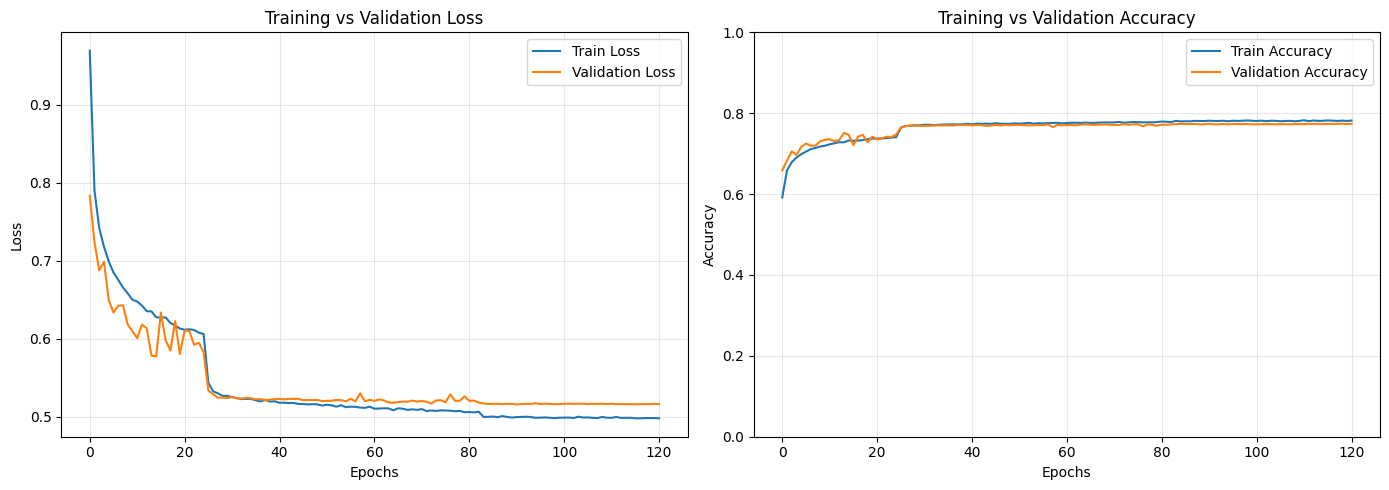

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ----- Loss -----
axes[0].plot(r.history['loss'], label='Train Loss')
axes[0].plot(r.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# ----- Accuracy -----
axes[1].plot(r.history['accuracy'], label='Train Accuracy')
axes[1].plot(r.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].set_ylim(0, 1)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Dự đoán xác suất
y_pred_proba = model.predict(final_X_test)

# Lấy nhãn dự đoán
y_pred_dl = np.argmax(y_pred_proba, axis=1)

# Tính chỉ số
acc_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='macro', zero_division=0)
recall_dl = recall_score(y_test, y_pred_dl, average='macro', zero_division=0)
f1_dl = f1_score(y_test, y_pred_dl, average='macro', zero_division=0)

776/776 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Thêm Deep Learning model và các chỉ số vào danh sách
models.append('Deep Learning')
accuracy_scores.append(acc_dl)
precision_scores.append(precision_dl)
recall_scores.append(recall_dl)
f1_scores.append(f1_dl)

In [ ]:
# 1. Thêm model mới (vẫn giữ index = 16)
new_index = model_perfs.index.max() + 1
new_row = pd.DataFrame({
    'Model': ['Deep Learning'],
    'Accuracy': [acc_dl],
    'Precision': [precision_dl],
    'Recall': [recall_dl],
    'F1': [f1_dl]
}, index=[new_index])

model_perfs = pd.concat([model_perfs, new_row])

# 2. Tạo DataFrame hiển thị (không đụng gì đến index)
display_df = model_perfs.copy()

# 3. Sắp xếp theo Accuracy (index giữ nguyên)
display_df = display_df.sort_values(by='Accuracy', ascending=False)

# 4. Tạo cột STT từ 0 đến N để hiển thị
display_df.insert(0, 'STT', range(1, len(display_df) + 1))  # bắt đầu từ 1 nếu muốn

display_df

,STT,Model,Accuracy,Precision,Recall,F1
10,1,"StackingClassifier(cv=5,\n e...",0.806011,0.765008,0.741473,0.735579
9,2,"VotingClassifier(estimators=[('XGB',\n ...",0.801378,0.758012,0.734949,0.729387
2,3,"(DecisionTreeClassifier(max_features=4, random...",0.797268,0.748075,0.726932,0.724459
7,4,"XGBClassifier(base_score=None, booster=None, c...",0.793038,0.742605,0.727093,0.723115
6,5,"(ExtraTreeClassifier(max_features=4, random_st...",0.792917,0.748140,0.724778,0.726858
5,6,HistGradientBoostingClassifier(),0.789009,0.735970,0.718170,0.714414
8,7,<catboost.core.CatBoostClassifier object at 0x...,0.783329,0.715187,0.687684,0.684626
4,8,(DecisionTreeClassifier(random_state=195292617...,0.780790,0.730484,0.725956,0.723748
11,9,Deep Learning,0.774143,0.661159,0.662696,0.657468
3,10,([DecisionTreeRegressor(criterion='friedman_ms...,0.759518,0.671926,0.644146,0.641423


In [ ]:
best_model = models[9]
best_model

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('LGBM', LGBMClassifier()),
                             ('ET', ExtraTreesClassifier()),
                             ('RF', RandomForestClassifier())],
                 n_jobs=-1, verbose=1, voting='soft', weights=[3, 3, 2, 2])

## Saving the best performing model for deployment into production

In [ ]:
dump(scaler, '/content/drive/MyDrive/DATN/source/model_daily/scaler.joblib', compress=3)

dump(encoder, '/content/drive/MyDrive/DATN/source/model_daily/label_encoder.joblib', compress=3)

['/content/drive/MyDrive/DATN/source/model_daily/label_encoder.joblib']

In [ ]:
dump(best_model, '/content/drive/MyDrive/DATN/source/model_daily/votingC.joblib', compress=0)

['/content/drive/MyDrive/DATN/source/model_daily/votingC.joblib']

In [ ]:
gc.collect()

12354

In [ ]:
import pandas as pd
import numpy as np
from joblib import load

# Đường dẫn đến các file đã lưu
scaler = load('/content/scaler.joblib')
encoder=load('/content/label_encoder.joblib')
best_model = load('/content/votingC.joblib')



# Định nghĩa lại các features cuối cùng đã được sử dụng (từ cell `UefjlYNvJEz8`)
final_selected_features = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
                           'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean',
                           'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant',
                           'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration', 'sin_doy', 'cos_doy']

### Hàm chuẩn bị dữ liệu đầu vào

In [ ]:
def prepare_input_data(input_df):
    """
    Chuẩn bị dữ liệu đầu vào cho dự đoán, áp dụng các bước tiền xử lý tương tự như khi huấn luyện.

    Args:
        input_df (pd.DataFrame): DataFrame chứa dữ liệu thô cần dự đoán.
                                  Cần có cột 'date' (chuỗi hoặc datetime).
                                  Các cột khác phải khớp với các đặc trưng được chọn ban đầu.

    Returns:
        pd.DataFrame: DataFrame đã được chuẩn hóa, sẵn sàng để dự đoán.
    """
    df_processed = input_df.copy()

    # Chuyển đổi cột 'date' sang định dạng datetime và tạo các đặc trưng thời gian
    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    df_processed['dayofyear'] = df_processed['date'].dt.dayofyear
    df_processed['sin_doy'] = np.sin(2 * np.pi * df_processed['dayofyear'] / 365)
    df_processed['cos_doy'] = np.cos(2 * np.pi * df_processed['dayofyear'] / 365)

    # Loại bỏ các cột không cần thiết cho mô hình
    df_processed = df_processed.drop(columns=['date', 'dayofyear'], errors='ignore')

    # Đảm bảo các cột theo đúng thứ tự đã huấn luyện và chỉ chọn các đặc trưng đã sử dụng
    df_processed = df_processed[final_selected_features]

    # Áp dụng StandardScaler
    scaled_data = scaler.transform(df_processed)
    df_scaled = pd.DataFrame(scaled_data, columns=final_selected_features)

    return df_scaled

### Hàm dự đoán

In [ ]:
def predict_weather_code(prepared_data):
    """
    Dự đoán mã thời tiết dựa trên dữ liệu đã được chuẩn bị.

    Args:
        prepared_data (pd.DataFrame): DataFrame chứa dữ liệu đã được chuẩn hóa,
                                      được tạo bởi hàm `prepare_input_data`.

    Returns:
        list: Danh sách các mã thời tiết dự đoán (giá trị gốc trước khi mã hóa).
    """
    predictions_encoded = best_model.predict(prepared_data)
    predictions_original = encoder.inverse_transform(predictions_encoded)
    return predictions_original.tolist()

### Ví dụ sử dụng

In [ ]:
# Tạo dữ liệu đầu vào mẫu cho một ngày cụ thể
# Các giá trị này chỉ là ví dụ và bạn nên thay thế bằng dữ liệu thực tế.
# Đảm bảo tất cả các cột trừ 'date' đều có mặt và đúng tên.
sample_data = pd.DataFrame({
    'date': ['2023-01-15'],
    'temperature_2m_mean': [22.5],
    'temperature_2m_max': [26.0],
    'temperature_2m_min': [19.0],
    'apparent_temperature_mean': [24.0],
    'apparent_temperature_max': [28.0],
    'apparent_temperature_min': [20.0],
    'dew_point_2m_mean': [18.0],
    'precipitation_sum': [0.5],
    'rain_sum': [0.5], # rain_sum is removed by DropDuplicateFeatures because it's identical to precipitation_sum
    'snowfall_sum': [0.0],
    'cloud_cover_mean': [60],
    'relative_humidity_2m_mean': [85],
    'wind_gusts_10m_mean': [15.0],
    'wind_speed_10m_mean': [8.0],
    'winddirection_10m_dominant': [120],
    'surface_pressure_mean': [1015.0],
    'pressure_msl_mean': [1017.0],
    'daylight_duration': [38000.0],
    'sunshine_duration': [10000.0],
    'province_id': [1] # province_id was used for sorting but not as a feature in the final model, can be ignored or set to a default if not a feature.
})

# Chuẩn bị dữ liệu
prepared_sample_data = prepare_input_data(sample_data)

# Thực hiện dự đoán
predicted_codes = predict_weather_code(prepared_sample_data)

print(f"Dữ liệu đầu vào mẫu:\n{sample_data}")
print(f"\nMã thời tiết dự đoán cho dữ liệu mẫu là: {predicted_codes}")

# Để giải thích mã thời tiết (ví dụ: tra cứu trong tài liệu WMO)
# 'weather_code' ban đầu là một mã số. Bạn có thể cần một ánh xạ để chuyển
# các mã này thành mô tả dễ hiểu hơn (ví dụ: 0 = Clear sky, 51 = Drizzle light, etc.)
# Dưới đây là một ví dụ về cách ánh xạ (bạn cần bổ sung đầy đủ)
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear, partly cloudy, or overcast',
    2: 'Mainly clear, partly cloudy, or overcast',
    3: 'Mainly clear, partly cloudy, or overcast',
    51: 'Drizzle: Light',
    53: 'Drizzle: Moderate',
    55: 'Drizzle: Dense',
    61: 'Rain: Light',
    63: 'Rain: Moderate',
    65: 'Rain: Heavy'
    # Thêm các mã khác nếu cần
}

described_predictions = [weather_code_map.get(code, f'Unknown code: {code}') for code in predicted_codes]
print(f"Mô tả thời tiết dự đoán: {described_predictions}")

Dữ liệu đầu vào mẫu:
         date  temperature_2m_mean  temperature_2m_max  temperature_2m_min  \
0  2023-01-15                 22.5                26.0                19.0   

   apparent_temperature_mean  apparent_temperature_max  \
0                       24.0                      28.0   

   apparent_temperature_min  dew_point_2m_mean  precipitation_sum  rain_sum  \
0                      20.0               18.0                0.5       0.5   

   ...  cloud_cover_mean  relative_humidity_2m_mean  wind_gusts_10m_mean  \
0  ...                60                         85                 15.0   

   wind_speed_10m_mean  winddirection_10m_dominant  surface_pressure_mean  \
0                  8.0                         120                 1015.0   

   pressure_msl_mean  daylight_duration  sunshine_duration  province_id  
0             1017.0            38000.0            10000.0            1  

[1 rows x 21 columns]

Mã thời tiết dự đoán cho dữ liệu mẫu là: [51]
Mô tả thời tiết dự đ